In [ ]:
!pip install pandas-datareader


In [ ]:
import pandas as pd
from pandas_datareader import data as web
from datetime import datetime
from datetime import timedelta
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


In [ ]:
start_date = datetime(2022, 6, 1)
end_date = datetime(2023, 5, 31)

In [ ]:
suzb_daily = web.DataReader("SUZB3.SAO", "av-daily-adjusted", start=start_date, end=end_date, api_key='UMV68KCXCEH0O39I')
suzb_daily.head()

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
2022-06-01,53.50,54.39,53.09,53.78,51.9032,4046900,0.0,1.0
2022-06-02,54.40,54.40,53.35,54.02,52.1348,3367900,0.0,1.0
2022-06-03,54.03,54.03,52.75,52.83,50.9864,2509700,0.0,1.0
2022-06-06,53.12,53.68,52.96,53.41,51.5461,2029400,0.0,1.0
2022-06-07,53.60,54.69,53.60,54.29,52.3954,3957400,0.0,1.0


In [ ]:
# Resetar o índice das linhas para transformar data em coluna regular
suzb_daily = suzb_daily.reset_index()
suzb_daily = suzb_daily.rename(columns={'index': 'data'})
suzb_daily.head()

,data,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
0,2022-06-01,53.50,54.39,53.09,53.78,51.9032,4046900,0.0,1.0
1,2022-06-02,54.40,54.40,53.35,54.02,52.1348,3367900,0.0,1.0
2,2022-06-03,54.03,54.03,52.75,52.83,50.9864,2509700,0.0,1.0
3,2022-06-06,53.12,53.68,52.96,53.41,51.5461,2029400,0.0,1.0
4,2022-06-07,53.60,54.69,53.60,54.29,52.3954,3957400,0.0,1.0


In [ ]:
# Valor médio calculado com base no 'high' e 'low'
suzb_daily['average']= suzb_daily[['high' , 'low']].mean(axis=1)
suzb_daily.head()


,data,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,average
0,2022-06-01,53.50,54.39,53.09,53.78,51.9032,4046900,0.0,1.0,53.740
1,2022-06-02,54.40,54.40,53.35,54.02,52.1348,3367900,0.0,1.0,53.875
2,2022-06-03,54.03,54.03,52.75,52.83,50.9864,2509700,0.0,1.0,53.390
3,2022-06-06,53.12,53.68,52.96,53.41,51.5461,2029400,0.0,1.0,53.320
4,2022-06-07,53.60,54.69,53.60,54.29,52.3954,3957400,0.0,1.0,54.145


In [ ]:
print(suzb_daily['data'].dtype)

object


In [ ]:
#Selecionando os valores de interesse de acordo com o enunciado
suzb_daily_ex = suzb_daily [ ['data','open','adjusted close', 'average' ] ].copy()
suzb_daily_ex.head()

,data,open,adjusted close,average
0,2022-06-01,53.50,51.9032,53.740
1,2022-06-02,54.40,52.1348,53.875
2,2022-06-03,54.03,50.9864,53.390
3,2022-06-06,53.12,51.5461,53.320
4,2022-06-07,53.60,52.3954,54.145


In [ ]:
#Convertendo objeto para datetime
suzb_daily_ex['data'] = pd.to_datetime(suzb_daily_ex['data'])
print(suzb_daily_ex['data'].dtype)

datetime64[ns]


In [ ]:
#Verificando células vazias ou com erro de conversão
suzb_daily_ex['data'].isnull().sum()

0

In [ ]:
suzb_daily_ex['data'].head()

0   2022-06-01
1   2022-06-02
2   2022-06-03
3   2022-06-06
4   2022-06-07
Name: data, dtype: datetime64[ns]

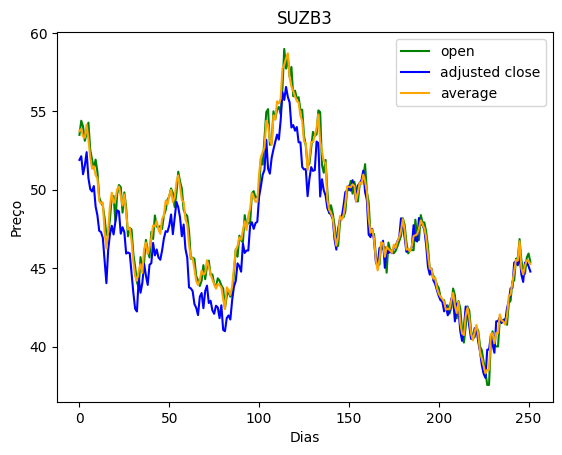

In [ ]:
suzb_daily_ex['open'].plot(color ='green')
suzb_daily_ex['adjusted close'].plot(color = 'blue')
suzb_daily_ex['average'].plot(color = 'orange')

plt.xlabel('Dias')
plt.ylabel('Preço')
plt.title('SUZB3')

plt.legend()

**Tratando dados do IBOV para calcular Beta**

In [ ]:
start_date = datetime(2022, 6, 1)
end_date = datetime(2023, 5, 31)

ibov_daily = yf.download('^BVSP', start_date, end_date)
ibov_daily.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-01,111351.0,111931.0,110822.0,111360.0,111360.0,9790200
2022-06-02,111363.0,112709.0,111218.0,112393.0,112393.0,10051100
2022-06-03,112392.0,112392.0,110935.0,111102.0,111102.0,8757500
2022-06-06,111102.0,111935.0,110015.0,110186.0,110186.0,8212400
2022-06-07,110185.0,110435.0,109394.0,110070.0,110070.0,9466200


In [ ]:
print(ibov_daily.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
# Valor médio calculado com base no 'high' e 'low'
ibov_daily['Average'] = ibov_daily[['High', 'Low']].mean(axis=1)
ibov_daily.head()

,Open,High,Low,Close,Adj Close,Volume,Average
Date,,,,,,,
2022-06-01,111351.0,111931.0,110822.0,111360.0,111360.0,9790200,111376.5
2022-06-02,111363.0,112709.0,111218.0,112393.0,112393.0,10051100,111963.5
2022-06-03,112392.0,112392.0,110935.0,111102.0,111102.0,8757500,111663.5
2022-06-06,111102.0,111935.0,110015.0,110186.0,110186.0,8212400,110975.0
2022-06-07,110185.0,110435.0,109394.0,110070.0,110070.0,9466200,109914.5


In [ ]:
# Resetar o índice das linhas para transformar data em coluna regular
ibov_daily = ibov_daily.reset_index()
ibov_daily = ibov_daily.rename(columns={'index': 'data'})
ibov_daily.rename(columns={'Date': 'data'}, inplace=True)
ibov_daily.head()

,data,Open,High,Low,Close,Adj Close,Volume,Average
0,2022-06-01,111351.0,111931.0,110822.0,111360.0,111360.0,9790200,111376.5
1,2022-06-02,111363.0,112709.0,111218.0,112393.0,112393.0,10051100,111963.5
2,2022-06-03,112392.0,112392.0,110935.0,111102.0,111102.0,8757500,111663.5
3,2022-06-06,111102.0,111935.0,110015.0,110186.0,110186.0,8212400,110975.0
4,2022-06-07,110185.0,110435.0,109394.0,110070.0,110070.0,9466200,109914.5


In [ ]:
print(ibov_daily['data'].dtype)

datetime64[ns]


In [ ]:
#Selecionando os valores de interesse de acordo com o enunciado
ibov_daily_ex = ibov_daily [['data','Open','Adj Close', 'Average']].copy()
ibov_daily_ex.head()

,data,Open,Adj Close,Average
0,2022-06-01,111351.0,111360.0,111376.5
1,2022-06-02,111363.0,112393.0,111963.5
2,2022-06-03,112392.0,111102.0,111663.5
3,2022-06-06,111102.0,110186.0,110975.0
4,2022-06-07,110185.0,110070.0,109914.5


In [ ]:
# Resetar o índice das linhas para transformar data em coluna regular
ibov_daily = ibov_daily.reset_index()
ibov_daily = ibov_daily.rename(columns={'index': 'data'})
ibov_daily.rename(columns={'Date': 'data'}, inplace=True)
ibov_daily.head()

,data,data,Open,High,Low,Close,Adj Close,Volume,Average
0,0,2022-06-01,111351.0,111931.0,110822.0,111360.0,111360.0,9790200,111376.5
1,1,2022-06-02,111363.0,112709.0,111218.0,112393.0,112393.0,10051100,111963.5
2,2,2022-06-03,112392.0,112392.0,110935.0,111102.0,111102.0,8757500,111663.5
3,3,2022-06-06,111102.0,111935.0,110015.0,110186.0,110186.0,8212400,110975.0
4,4,2022-06-07,110185.0,110435.0,109394.0,110070.0,110070.0,9466200,109914.5


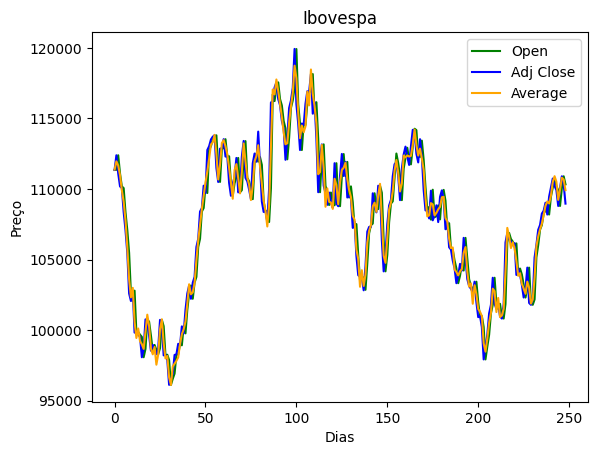

In [ ]:
ibov_daily['Open'].plot(color ='green')
ibov_daily['Adj Close'].plot(color = 'blue')
ibov_daily['Average'].plot(color = 'orange')

plt.xlabel('Dias')
plt.ylabel('Preço')
plt.title('Ibovespa')

plt.legend()


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 6

filtro =  suzb_daily_ex['data'].dt.month == mes_especifico
df_filtrado = suzb_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
0,2022-06-01,53.50,51.9032,53.740
1,2022-06-02,54.40,52.1348,53.875
2,2022-06-03,54.03,50.9864,53.390
3,2022-06-06,53.12,51.5461,53.320
4,2022-06-07,53.60,52.3954,54.145


In [ ]:
preco_open = df_filtrado['open']
retorno_suzb_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1 #retorno_suz_open = preco_open.pct_change().dropna()

preco_adjusted_close = df_filtrado['adjusted close']
retorno_suzb_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_suzb_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1


**Desvio Padrão**

In [ ]:
#open
dp_suzb_open_junho = retorno_suzb_open.std()

#adjusted close
dp_suzb_adjusted_close_junho= retorno_suzb_adjusted_close.std()

#average
dp_suzb_average_junho= retorno_suzb_average.std()

print (dp_suzb_open_junho)
print (dp_suzb_adjusted_close_junho)
print (dp_suzb_average_junho)

0.017932509748162635
0.021159943058716654
0.017868079743198498


**Índice Sharpe**

In [ ]:
##risk_free_rate = 0.01375

#open
#sharpe_ratio_open = (np.mean(retorno_suz_open) - risk_free_rate) / dp_suz_open

#adjusted close
#sharpe_ratio_adjusted_close = (np.mean(retorno_suz_adjusted_close) - risk_free_rate) / dp_suz_adjusted_close

#average
#sharpe_ratio_average = (np.mean(retorno_suz_average) - risk_free_rate) / dp_suz_average


#print(sharpe_ratio_open)
#print(sharpe_ratio_adjusted_close)
#print(sharpe_ratio_average)


**VaR histórico**

VaR(95) = 2% significa que tenho 95% de certeza que minhas perdas não serão maiores do que 2%, ou que há uma possibilidade de 5% de minhas perdas excederem 2%.

In [ ]:
#VaR histórico:- df.quantile(.05) significa biblioteca para calcular o quantil de 5% do dataframe.
#O resultado é o valor correspondente ao percentil de 5%, ou seja, o valor abaixo do qual 5% dos dados estão localizados,
# ou seja, há uma possibilidade de 5% de minhas perdas excederem 2% (VaR(95%))

VaR_SUZB3_open_junho_2022 = - retorno_suzb_open.quantile(.05)
print(VaR_SUZB3_open_junho_2022)

0.03208241691104598


In [ ]:
VaR_SUZB3_adjusted_close_junho_22 = - retorno_suzb_adjusted_close.quantile(.05)
print(VaR_SUZB3_adjusted_close_junho_22)

0.03162439386844189


In [ ]:
VaR_SUZB3_average_junho_22 = - retorno_suzb_average.quantile(.05)
print(VaR_SUZB3_average_junho_22)

0.029049461274961694


**VaR Paramétrico**

In [ ]:
z = scipy.stats.norm.ppf(.05)
print(z)

-1.6448536269514729


In [ ]:
#ppf da bb SciPy retorna o valor crítico z correspondente a um nível de confiança de 95%. Neste caso, .05 representa o quantil de 5% (ou nível de confiança de 95%)
#da distribuição normal padrão. Esse valor crítico é usado para calcular o quantil inferior para o VaR.

#ddof=0 indica que o desvio padrão amostral não será ajustado pela correção de Bessel (n-1).
#ddof=1 desvio ajustado para amostra.

In [ ]:
VaRg_SUZB3_open_junho_22 =-((retorno_suzb_open).mean()+z*(retorno_suzb_open).std(ddof=1))
print(VaRg_SUZB3_open_junho_22)

0.034762720913075335


In [ ]:
VaRg_SUZB3_adjusted_close_junho_22 = -((retorno_suzb_adjusted_close).mean()+z*(retorno_suzb_adjusted_close).std(ddof=1))
print(VaRg_SUZB3_adjusted_close_junho_22)

0.03854019172708166


In [ ]:
VaRg_SUZB3_average_junho_22 =-((retorno_suzb_average).mean()+z*(retorno_suzb_average).std(ddof=1))
print(VaRg_SUZB3_average_junho_22)

0.03348030834124464


**CVaR**

In [ ]:
print("Skewness:", scipy.stats.skew(retorno_suzb_open))
print("Kurtosis:", scipy.stats.kurtosis(retorno_suzb_open))

Skewness: 0.1403959027553664
Kurtosis: -0.8661076912362438


In [ ]:
print("Skewness:", scipy.stats.skew(retorno_suzb_adjusted_close))
print("Kurtosis:", scipy.stats.kurtosis(retorno_suzb_adjusted_close))

Skewness: 0.5588896900727933
Kurtosis: -0.06112713418434401


In [ ]:
print("Skewness:", scipy.stats.skew(retorno_suzb_average))
print("Kurtosis:", scipy.stats.kurtosis(retorno_suzb_average))

Skewness: 0.23583036420243791
Kurtosis: -0.34242880901897266


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_open)
k = scipy.stats.kurtosis(retorno_suzb_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_open_junho_22 = (-(retorno_suzb_open.mean() + z*retorno_suzb_open.std(ddof=1))) #var
print(CF_SUZB3_open_junho_22)

0.034353858280537525


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_adjusted_close)
k = scipy.stats.kurtosis(retorno_suzb_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_adjusted_close_junho_22 = (-(retorno_suzb_adjusted_close.mean() + z*retorno_suzb_adjusted_close.std(ddof=1)))
#print(-(retorno_suzb_adjusted_close.mean() + z*retorno_suzb_adjusted_close.std(ddof=1))) #var
print(CF_SUZB3_adjusted_close_junho_22)

0.035080503441835865


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_average)
k = scipy.stats.kurtosis(retorno_suzb_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_average_junho_22= (-(retorno_suzb_average.mean() + z*retorno_suzb_average.std(ddof=1))) #var -(df.mean() + z*df.std(ddof=0))
#(-(retorno_suzb_average.mean() + z*retorno_suzb_average.std(ddof=1))) #var
print(CF_SUZB3_average_junho_22)

0.03238730648924414


In [ ]:
# Junho

#Armazenar as saídas em uma lista
VaR_SUZB3_Junho = [VaR_SUZB3_open_junho_2022, VaR_SUZB3_adjusted_close_junho_22, VaR_SUZB3_average_junho_22]
VaRg_SUZB3_Junho = [VaRg_SUZB3_open_junho_22, VaRg_SUZB3_adjusted_close_junho_22, VaRg_SUZB3_average_junho_22]
CF_SUZB3_Junho = [CF_SUZB3_open_junho_22, CF_SUZB3_adjusted_close_junho_22, CF_SUZB3_average_junho_22]
DP_SUZB3_Junho = [dp_suzb_open_junho,dp_suzb_adjusted_close_junho, dp_suzb_average_junho ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_SUZB3_Junho': DP_SUZB3_Junho, 'VaR_SUZB3_Junho': VaR_SUZB3_Junho, 'VaRg_SUZB3_Junho': VaRg_SUZB3_Junho, 'CF_SUZB3_Junho': CF_SUZB3_Junho})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_SUZB3_Junho,VaR_SUZB3_Junho,VaRg_SUZB3_Junho,CF_SUZB3_Junho
open,0.017933,0.032082,0.034763,0.034354
adjusted close,0.021160,0.031624,0.038540,0.035081
average,0.017868,0.029049,0.033480,0.032387


**Beta**

In [ ]:
start_date = datetime(2022, 6, 1)
end_date = datetime(2023, 5, 31)

ibov_daily = yf.download('^BVSP', start_date, end_date)
ibov_daily.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-01,111351.0,111931.0,110822.0,111360.0,111360.0,9790200
2022-06-02,111363.0,112709.0,111218.0,112393.0,112393.0,10051100
2022-06-03,112392.0,112392.0,110935.0,111102.0,111102.0,8757500
2022-06-06,111102.0,111935.0,110015.0,110186.0,110186.0,8212400
2022-06-07,110185.0,110435.0,109394.0,110070.0,110070.0,9466200


In [ ]:
print(ibov_daily.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
# Valor médio calculado com base no 'high' e 'low'
ibov_daily['Average'] = ibov_daily[['High', 'Low']].mean(axis=1)
ibov_daily.head()

,Open,High,Low,Close,Adj Close,Volume,Average
Date,,,,,,,
2022-06-01,111351.0,111931.0,110822.0,111360.0,111360.0,9790200,111376.5
2022-06-02,111363.0,112709.0,111218.0,112393.0,112393.0,10051100,111963.5
2022-06-03,112392.0,112392.0,110935.0,111102.0,111102.0,8757500,111663.5
2022-06-06,111102.0,111935.0,110015.0,110186.0,110186.0,8212400,110975.0
2022-06-07,110185.0,110435.0,109394.0,110070.0,110070.0,9466200,109914.5


In [ ]:
# Resetar o índice das linhas para transformar data em coluna regular
ibov_daily = ibov_daily.reset_index()
ibov_daily = ibov_daily.rename(columns={'index': 'data'})
ibov_daily.rename(columns={'Date': 'data'}, inplace=True)
ibov_daily.head()

,data,Open,High,Low,Close,Adj Close,Volume,Average
0,2022-06-01,111351.0,111931.0,110822.0,111360.0,111360.0,9790200,111376.5
1,2022-06-02,111363.0,112709.0,111218.0,112393.0,112393.0,10051100,111963.5
2,2022-06-03,112392.0,112392.0,110935.0,111102.0,111102.0,8757500,111663.5
3,2022-06-06,111102.0,111935.0,110015.0,110186.0,110186.0,8212400,110975.0
4,2022-06-07,110185.0,110435.0,109394.0,110070.0,110070.0,9466200,109914.5


In [ ]:
print(ibov_daily['data'].dtype)

datetime64[ns]


In [ ]:
#Selecionando os valores de interesse de acordo com o enunciado
ibov_daily_ex = ibov_daily [['data','Open','Adj Close', 'Average']].copy()
ibov_daily_ex.head()

,data,Open,Adj Close,Average
0,2022-06-01,111351.0,111360.0,111376.5
1,2022-06-02,111363.0,112393.0,111963.5
2,2022-06-03,112392.0,111102.0,111663.5
3,2022-06-06,111102.0,110186.0,110975.0
4,2022-06-07,110185.0,110070.0,109914.5


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 6

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()



,data,Open,Adj Close,Average
0,2022-06-01,111351.0,111360.0,111376.5
1,2022-06-02,111363.0,112393.0,111963.5
2,2022-06-03,112392.0,111102.0,111663.5
3,2022-06-06,111102.0,110186.0,110975.0
4,2022-06-07,110185.0,110070.0,109914.5


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

1    0.000108
2    0.009240
3   -0.011478
4   -0.008254
5   -0.001071
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

1    0.009276
2   -0.011486
3   -0.008245
4   -0.001053
5   -0.015463
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head()

1    0.005270
2   -0.002679
3   -0.006166
4   -0.009556
5   -0.007469
Name: Average, dtype: float64

In [ ]:
X = retorno_ibov_open
Y = retorno_suzb_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_junho =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
0.39863386885746377
Coeficiente de Determinação (R²):
0.07149950535427319
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                   open   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.386
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.254
Time:                        23:56:55   Log-Likelihood:                 53.299
No. Observations:                  20   AIC:                            -102.6
Df Residuals:                      18   BIC:                            -100.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975

In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_suzb_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_junho =(model.params[1])

print("Junho:")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Junho:
Coeficiente Beta:
0.7506723261950856
Coeficiente de Determinação (R²):
0.18204499647651673
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:         adjusted close   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     4.006
Date:                Wed, 12 Jul 2023   Prob (F-statistic):             0.0606
Time:                        23:56:55   Log-Likelihood:                 51.257
No. Observations:                  20   AIC:                            -98.51
Df Residuals:                      18   BIC:                            -96.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

In [ ]:
X = retorno_ibov_average
Y = retorno_suzb_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_junho =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
0.8556632438166409
Coeficiente de Determinação (R²):
0.24764638749713386
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     5.925
Date:                Wed, 12 Jul 2023   Prob (F-statistic):             0.0256
Time:                        23:56:55   Log-Likelihood:                 55.474
No. Observations:                  20   AIC:                            -106.9
Df Residuals:                      18   BIC:                            -105.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

In [ ]:
data = {'open': [beta_open_junho],
    'adjusted close': [beta_adjusted_close_junho],
    'average': [beta_average_junho]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

           open  adjusted close   average
Betas  0.398634        0.750672  0.855663


**CAPM**

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_junho)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_junho = rf + beta_open_junho * (rm - rf)

print("Retorno esperado é:", re_open_junho)

0.39863386885746377
-0.005482137972576256
Retorno esperado é: 0.0043057266777399225


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_junho)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_junho = rf + beta_adjusted_close_junho * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_junho)

0.7506723261950856
-0.0060265445995932865
Retorno esperado é: -0.0018327395121300067


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_junho)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_junho = rf + beta_average_junho * (rm - rf)

print("Retorno esperado é:", re_average_junho)

0.8556632438166409
-0.005977630309769655
Retorno esperado é: -0.0035568804290675975


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_junho],
    'adjusted close': [re_adjusted_close_junho],
    'average': [re_average_junho]}

df = pd.DataFrame(data, index=['Retorno esperado_SUZB3_Junho'])

# Imprimir a tabela
print(df)

                                  open  adjusted close   average
Retorno esperado_SUZB3_Junho  0.004306       -0.001833 -0.003557


In [ ]:
#Retorno realizado mensal
rk_open_junho = np.mean(retorno_suzb_open)
rk_adjusted_close_junho = np.mean(retorno_suzb_adjusted_close)
rk_average_junho = np.mean(retorno_suzb_average)

Re_SUZB3_Junho = [re_open_junho, re_adjusted_close_junho, re_average_junho]
Rk_SUZB3_Junho = [rk_open_junho, rk_adjusted_close_junho, rk_average_junho]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_SUZB3_Junho' : Re_SUZB3_Junho, 'Rk_SUZB3_Junho': Rk_SUZB3_Junho})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_SUZB3_Junho,Rk_SUZB3_Junho
open,0.004306,-0.005266
adjusted close,-0.001833,-0.003735
average,-0.003557,-0.004090


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 7

filtro =  suzb_daily_ex['data'].dt.month == mes_especifico
df_filtrado = suzb_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
21,2022-07-01,49.71,48.6894,50.030
22,2022-07-04,50.30,48.6122,50.200
23,2022-07-05,50.17,47.1935,49.590
24,2022-07-06,48.54,47.6085,48.990
25,2022-07-07,49.83,47.2804,49.695


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_suzb_open_julho = retorno_suzb_open.std()

#adjusted close
dp_suzb_adjusted_close_julho= retorno_suzb_adjusted_close.std()

#average
dp_suzb_average_julho= retorno_suzb_average.std()

print (dp_suzb_open_julho)
print (dp_suzb_adjusted_close_julho)
print (dp_suzb_average_julho)

0.017932509748162635
0.021159943058716654
0.017868079743198498


In [ ]:
preco_open = df_filtrado['open']
retorno_suzb_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_suzb_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_suzb_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_SUZB3_open_julho_22 = - retorno_suzb_open.quantile(.05)
print(VaR_SUZB3_open_julho_22)

0.033299161894136134


In [ ]:
VaR_SUZB3_adjusted_close_julho_22 = - retorno_suzb_adjusted_close.quantile(.05)
print(VaR_SUZB3_adjusted_close_julho_22)

0.028608718101150826


In [ ]:
VaR_SUZB3_average_julho_22 = - retorno_suzb_average.quantile(.05)
print(VaR_SUZB3_average_julho_22)

0.024261614416773214


In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_SUZB3_open_julho_22 =-((retorno_suzb_open).mean()+z*retorno_suzb_open.std(ddof=1))
print(VaRg_SUZB3_open_julho_22 )

0.04183798503958646


In [ ]:
VaRg_SUZB3_adjusted_close_julho_22 = -((retorno_suzb_adjusted_close).mean()+z*retorno_suzb_adjusted_close.std(ddof=1))
print(VaRg_SUZB3_adjusted_close_julho_22)

0.039414507056281405


In [ ]:
VaRg_SUZB3_average_julho_22 =-((retorno_suzb_average).mean()+z*retorno_suzb_average.std(ddof=1))
print(VaRg_SUZB3_average_julho_22)

0.030234456358756958


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_open)
k = scipy.stats.kurtosis(retorno_suzb_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36



CF_SUZB3_open_julho_22=(-(retorno_suzb_open.mean() + z*retorno_suzb_open.std(ddof=1))) #var
print(CF_SUZB3_open_julho_22)

0.03904338107983286


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_adjusted_close)
k = scipy.stats.kurtosis(retorno_suzb_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_adjusted_close_julho_22 = (-(retorno_suzb_adjusted_close.mean() + z*retorno_suzb_adjusted_close.std(ddof=1))) #var
print(CF_SUZB3_adjusted_close_julho_22)

0.03543141872719984


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_average)
k = scipy.stats.kurtosis(retorno_suzb_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36



CF_SUZB3_average_julho_22=(-(retorno_suzb_average.mean() + z*retorno_suzb_average.std(ddof=1))) #var
print(CF_SUZB3_average_julho_22)

0.02929811194368126


In [ ]:
CVaR_SUZB3_open_julho_22 = - retorno_suzb_open[retorno_suzb_open <= -(retorno_suzb_open.mean() + z * retorno_suzb_open.std(ddof=1))].mean()
CVaR_SUZB3_adjusted_close_julho_22 = - retorno_suzb_adjusted_close[retorno_suzb_adjusted_close <=
                                                                 -(retorno_suzb_adjusted_close.mean() + z * retorno_suzb_adjusted_close.std(ddof=1))].mean()
CVaR_SUZB3_average_julho_22 = - retorno_suzb_average[retorno_suzb_average <= -(retorno_suzb_average.mean() + z * retorno_suzb_average.std(ddof=1))].mean()

print(CVaR_SUZB3_open_julho_22)
print(CVaR_SUZB3_adjusted_close_julho_22)
print(CVaR_SUZB3_average_julho_22)

0.0051539239649528445
0.004676788464490845
0.004153448364030216


In [ ]:
# Julho

#Armazenar as saídas em uma lista
VaR_SUZB3_Julho = [VaR_SUZB3_open_julho_22, VaR_SUZB3_adjusted_close_julho_22, VaR_SUZB3_average_julho_22]
VaRg_SUZB3_Julho = [VaRg_SUZB3_open_julho_22, VaRg_SUZB3_adjusted_close_julho_22, VaRg_SUZB3_average_julho_22]
CF_SUZB3_Julho = [CF_SUZB3_open_julho_22, CF_SUZB3_adjusted_close_julho_22, CF_SUZB3_average_julho_22]
DP_SUZB3_Julho = [dp_suzb_open_julho,dp_suzb_adjusted_close_julho, dp_suzb_average_julho ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_SUZB3_Julho': DP_SUZB3_Julho, 'VaR_SUZB3_Julho': VaR_SUZB3_Julho,
                   'VaRg_SUZB3_Julho': VaRg_SUZB3_Julho, 'CF_SUZB3_Julho': CF_SUZB3_Julho})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_SUZB3_Julho,VaR_SUZB3_Julho,VaRg_SUZB3_Julho,CF_SUZB3_Julho
open,0.017933,0.033299,0.041838,0.039043
adjusted close,0.021160,0.028609,0.039415,0.035431
average,0.017868,0.024262,0.030234,0.029298


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 7

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()


,data,Open,Adj Close,Average
21,2022-07-01,98542.0,98954.0,98285.5
22,2022-07-04,98952.0,98609.0,98808.5
23,2022-07-05,98608.0,98295.0,97553.5
24,2022-07-06,98294.0,98719.0,98282.0
25,2022-07-07,98722.0,100730.0,100071.0


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

22    0.004161
23   -0.003476
24   -0.003184
25    0.004354
26    0.020360
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

22   -0.003486
23   -0.003184
24    0.004314
25    0.020371
26   -0.004378
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head()

22    0.005321
23   -0.012701
24    0.007468
25    0.018203
26    0.006960
Name: Average, dtype: float64

In [ ]:
X = retorno_ibov_open
Y = retorno_suzb_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_julho =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
0.6025408090953077
Coeficiente de Determinação (R²):
0.06981066994739116
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                   open   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.351
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.260
Time:                        23:56:56   Log-Likelihood:                 47.614
No. Observations:                  20   AIC:                            -91.23
Df Residuals:                      18   BIC:                            -89.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_suzb_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_julho =(model.params[1])

print("Julho:")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Julho:
Coeficiente Beta:
0.9229418284425817
Coeficiente de Determinação (R²):
0.17990662409568148
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:         adjusted close   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     3.949
Date:                Wed, 12 Jul 2023   Prob (F-statistic):             0.0623
Time:                        23:56:56   Log-Likelihood:                 49.753
No. Observations:                  20   AIC:                            -95.51
Df Residuals:                      18   BIC:                            -93.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

In [ ]:
X = retorno_ibov_average
Y = retorno_suzb_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_julho =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
0.9856255311872631
Coeficiente de Determinação (R²):
0.3340551245516765
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     9.029
Date:                Wed, 12 Jul 2023   Prob (F-statistic):            0.00760
Time:                        23:56:56   Log-Likelihood:                 57.659
No. Observations:                  20   AIC:                            -111.3
Df Residuals:                      18   BIC:                            -109.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
data = {'open': [beta_open_julho],
    'adjusted close': [beta_adjusted_close_julho],
    'average': [beta_average_julho]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

           open  adjusted close   average
Betas  0.602541        0.922942  0.985626


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_julho)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_julho = rf + beta_open_julho * (rm - rf)

print("Retorno esperado é:", re_open_julho)

0.6025408090953077
0.0020701173253123706
Retorno esperado é: 0.0055374693335174


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_julho)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_julho = rf + beta_adjusted_close_julho * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_julho)

0.9229418284425817
0.002138000527991657
Retorno esperado é: 0.0028050091684582897


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_julho)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_julho = rf + beta_average_julho * (rm - rf)

print("Retorno esperado é:", re_average_junho)

0.9856255311872631
0.0025150251824768545
Retorno esperado é: -0.0035568804290675975


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_julho],
    'adjusted close': [re_adjusted_close_julho],
    'average': [re_average_julho]}

df = pd.DataFrame(data, index=['Retorno estimado_SUZB3_Julho'])

# Imprimir a tabela
print(df)

                                  open  adjusted close   average
Retorno estimado_SUZB3_Julho  0.005537        0.002805  0.002634


In [ ]:
#Retorno realizado mensal
rk_open_julho = np.mean(retorno_suzb_open)
rk_adjusted_close_julho = np.mean(retorno_suzb_adjusted_close)
rk_average_julho = np.mean(retorno_suzb_average)

Re_SUZB3_Julho = [re_open_julho, re_adjusted_close_julho, re_average_julho]
Rk_SUZB3_Julho = [rk_open_julho, rk_adjusted_close_julho, rk_average_julho]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_SUZB3_Julho' : Re_SUZB3_Julho, 'Rk_SUZB3_Julho': Rk_SUZB3_Julho})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_SUZB3_Julho,Rk_SUZB3_Julho
open,0.005537,-0.002680
adjusted close,0.002805,-0.001941
average,0.002634,-0.002228


In [ ]:
print(re_open_julho)

0.0055374693335174


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 8

filtro =  suzb_daily_ex['data'].dt.month == mes_especifico
df_filtrado = suzb_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
42,2022-08-01,48.36,45.8134,47.655
43,2022-08-02,47.65,46.1898,48.000
44,2022-08-03,47.61,45.6783,47.460
45,2022-08-04,47.68,45.5335,47.185
46,2022-08-05,47.50,46.1222,48.130


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_suzb_open_agosto = retorno_suzb_open.std()

#adjusted close
dp_suzb_adjusted_close_agosto= retorno_suzb_adjusted_close.std()

#average
dp_suzb_average_agosto= retorno_suzb_average.std()

print (dp_suzb_open_agosto)
print (dp_suzb_adjusted_close_agosto)
print (dp_suzb_average_agosto)

0.023806612836971372
0.022782496841807463
0.01702647967816649


In [ ]:
preco_open = df_filtrado['open']
retorno_suzb_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_suzb_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_suzb_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_SUZB3_open_agosto_22 = - retorno_suzb_open.quantile(.05)
print(VaR_SUZB3_open_agosto_22)

0.026797046518486734


In [ ]:
VaR_SUZB3_adjusted_close_agosto_22 = - retorno_suzb_adjusted_close.quantile(.05)
print(VaR_SUZB3_adjusted_close_agosto_22)

0.03199517242823608


In [ ]:
VaR_SUZB3_average_agosto_22 = - retorno_suzb_average.quantile(.05)
print(VaR_SUZB3_average_agosto_22)

0.022110179304046067


In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_SUZB3_open_agosto_22 =-((retorno_suzb_open).mean()+z*retorno_suzb_open.std(ddof=1))
print(VaRg_SUZB3_open_agosto_22 )

0.027930504346752913


In [ ]:
VaRg_SUZB3_adjusted_close_agosto_22 =-((retorno_suzb_adjusted_close).mean()+z*retorno_suzb_adjusted_close.std(ddof=1))
print(VaRg_SUZB3_adjusted_close_agosto_22 )

0.03268794693156016


In [ ]:
VaRg_SUZB3_average_agosto_22 =-((retorno_suzb_average).mean()+z*retorno_suzb_average.std(ddof=1))
print(VaRg_SUZB3_average_agosto_22 )

0.025739418454988842


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_open)
k = scipy.stats.kurtosis(retorno_suzb_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_open_agosto_22 = (-(retorno_suzb_open.mean() + z*retorno_suzb_open.std(ddof=1))) #var
print(CF_SUZB3_open_agosto_22 )

0.028919435752835943


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_adjusted_close)
k = scipy.stats.kurtosis(retorno_suzb_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_adjusted_close_agosto_22 = (-(retorno_suzb_adjusted_close.mean() + z*retorno_suzb_adjusted_close.std(ddof=1))) #var
print(CF_SUZB3_adjusted_close_agosto_22)

0.03513425897737038


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_average)
k = scipy.stats.kurtosis(retorno_suzb_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_average_agosto_22 =(-(retorno_suzb_average.mean() + z*retorno_suzb_average.std(ddof=1))) #var
print(CF_SUZB3_average_agosto_22)

0.025685654695517767


In [ ]:
CVaR_SUZB3_open_agosto_22 = - retorno_suzb_open[retorno_suzb_open <= -(retorno_suzb_open.mean() + z * retorno_suzb_open.std(ddof=1))].mean()
CVaR_SUZB3_adjusted_close_agosto_22 = - retorno_suzb_adjusted_close[retorno_suzb_adjusted_close <=
                                                            -(retorno_suzb_adjusted_close.mean() + z * retorno_suzb_adjusted_close.std(ddof=1))].mean()
CVaR_SUZB3_average_agosto_22 = - retorno_suzb_average[retorno_suzb_average <= -(retorno_suzb_average.mean() + z * retorno_suzb_average.std(ddof=1))].mean()

print(CVaR_SUZB3_open_agosto_22)
print(CVaR_SUZB3_adjusted_close_agosto_22)
print(CVaR_SUZB3_average_agosto_22)

0.002563437500736045
0.0030209621347002166
0.002557713309770307


In [ ]:
# Agosto

#Armazenar as saídas em uma lista
VaR_SUZB3_Agosto = [VaR_SUZB3_open_agosto_22, VaR_SUZB3_adjusted_close_agosto_22, VaR_SUZB3_average_agosto_22]
VaRg_SUZB3_Agosto = [VaRg_SUZB3_open_agosto_22, VaRg_SUZB3_adjusted_close_agosto_22, VaRg_SUZB3_average_agosto_22]
CF_SUZB3_Agosto = [CF_SUZB3_open_agosto_22, CF_SUZB3_adjusted_close_agosto_22 , CF_SUZB3_average_agosto_22]
DP_SUZB3_Agosto = [dp_suzb_open_agosto,dp_suzb_adjusted_close_agosto, dp_suzb_average_agosto ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_SUZB3_Agosto': DP_SUZB3_Agosto, 'VaR_SUZB3_Agosto': VaR_SUZB3_Agosto,
                   'VaRg_SUZB3_Agosto': VaRg_SUZB3_Agosto, 'CF_SUZB3_Agosto': CF_SUZB3_Agosto})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_SUZB3_Agosto,VaR_SUZB3_Agosto,VaRg_SUZB3_Agosto,CF_SUZB3_Agosto
open,0.023807,0.026797,0.027931,0.028919
adjusted close,0.022782,0.031995,0.032688,0.035134
average,0.017026,0.022110,0.025739,0.025686


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 8

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()

,data,Open,Adj Close,Average
42,2022-08-01,103165.0,102225.0,102540.5
43,2022-08-02,102225.0,103362.0,102677.0
44,2022-08-03,103362.0,103775.0,103350.0
45,2022-08-04,103777.0,105892.0,104969.5
46,2022-08-05,105893.0,106472.0,106347.0


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

43   -0.009112
44    0.011123
45    0.004015
46    0.020390
47    0.005477
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

43    0.011123
44    0.003996
45    0.020400
46    0.005477
47    0.018127
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head() #valor em percentual

43    0.001331
44    0.006555
45    0.015670
46    0.013123
47    0.010663
Name: Average, dtype: float64

In [ ]:
X = retorno_ibov_open
Y = retorno_suzb_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_agosto =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
0.3285075656829593
Coeficiente de Determinação (R²):
0.0690202727073389
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                   open   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.483
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.238
Time:                        23:56:57   Log-Likelihood:                 61.865
No. Observations:                  22   AIC:                            -119.7
Df Residuals:                      20   BIC:                            -117.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_suzb_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_agosto =(model.params[1])

print("Agosto:")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Agosto:
Coeficiente Beta:
0.7628643577479021
Coeficiente de Determinação (R²):
0.27052841827763285
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:         adjusted close   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     7.417
Date:                Wed, 12 Jul 2023   Prob (F-statistic):             0.0131
Time:                        23:56:57   Log-Likelihood:                 61.103
No. Observations:                  22   AIC:                            -118.2
Df Residuals:                      20   BIC:                            -116.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

In [ ]:
X = retorno_ibov_average
Y = retorno_suzb_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_agosto =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
0.650591439097092
Coeficiente de Determinação (R²):
0.17027048687240465
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     4.104
Date:                Wed, 12 Jul 2023   Prob (F-statistic):             0.0563
Time:                        23:56:57   Log-Likelihood:                 65.113
No. Observations:                  22   AIC:                            -126.2
Df Residuals:                      20   BIC:                            -124.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
data = {'open': [beta_open_agosto],
    'adjusted close': [beta_adjusted_close_agosto],
    'average': [beta_average_agosto]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

           open  adjusted close   average
Betas  0.328508        0.762864  0.650591


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_agosto)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_agosto = rf + beta_open_agosto * (rm - rf)

print("Retorno esperado é:", re_open_agosto)

0.3285075656829593
0.0031708150511855545
Retorno esperado é: 0.008289666362038511


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_agosto)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_agosto = rf + beta_adjusted_close_agosto * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_agosto)

0.7628643577479021
0.003211288872304334
Retorno esperado é: 0.005009398859986896


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_agosto)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_agosto = rf + beta_average_agosto * (rm - rf)

print("Retorno esperado é:", re_average_agosto)

0.650591439097092
0.003418695309796216
Retorno esperado é: 0.005995658839156573


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_agosto],
    'adjusted close': [re_adjusted_close_agosto],
    'average': [re_average_agosto]}

df = pd.DataFrame(data, index=['Retorno esperado_SUZB3_agosto'])

# Imprimir a tabela
print(df)

                                  open  adjusted close   average
Retorno esperado_SUZB3_agosto  0.00829        0.005009  0.005996


In [ ]:
#Retorno realizado mensal
rk_open_agosto = np.mean(retorno_suzb_open)
rk_adjusted_close_agosto = np.mean(retorno_suzb_adjusted_close)
rk_average_agosto = np.mean(retorno_suzb_average)

Re_SUZB3_Agosto = [re_open_agosto, re_adjusted_close_agosto, re_average_agosto]
Rk_SUZB3_Agosto = [rk_open_agosto, rk_adjusted_close_agosto, rk_average_agosto]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_SUZB3_Agosto' : Re_SUZB3_Agosto, 'Rk_SUZB3_Agosto': Rk_SUZB3_Agosto})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_SUZB3_Agosto,Rk_SUZB3_Agosto
open,0.008290,-0.002563
adjusted close,0.005009,-0.003021
average,0.005996,-0.002558


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 9

filtro =  suzb_daily_ex['data'].dt.month == mes_especifico
df_filtrado = suzb_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
65,2022-09-01,44.48,42.4645,44.175
66,2022-09-02,44.22,42.0013,43.930
67,2022-09-05,43.86,43.1690,44.235
68,2022-09-06,44.20,43.4103,44.845
69,2022-09-08,45.19,42.4452,44.585


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_suzb_open_setembro = retorno_suzb_open.std()

#adjusted close
dp_suzb_adjusted_close_setembro= retorno_suzb_adjusted_close.std()

#average
dp_suzb_average_setembro= retorno_suzb_average.std()

print (dp_suzb_open_setembro)
print (dp_suzb_adjusted_close_setembro)
print (dp_suzb_average_setembro)

0.015422081594598482
0.018036246089473584
0.014093476018399814


In [ ]:
preco_open = df_filtrado['open']
retorno_suzb_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_suzb_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_suzb_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_SUZB3_open_setembro_22 = - retorno_suzb_open.quantile(.05)
print(VaR_SUZB3_open_setembro_22)

0.020658885943779803


In [ ]:
VaR_SUZB3_adjusted_close_setembro_22 = - retorno_suzb_adjusted_close.quantile(.05)
print(VaR_SUZB3_adjusted_close_setembro_22)

0.025872654934283288


In [ ]:
VaR_SUZB3_average_setembro_22 = - retorno_suzb_average.quantile(.05)
print(VaR_SUZB3_average_setembro_22)

0.015195781022331179


In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_SUZB3_open_setembro_22 =-((retorno_suzb_open).mean()+z*retorno_suzb_open.std(ddof=1))
print(VaRg_SUZB3_open_setembro_22 )

0.02387319360198819


In [ ]:
VaRg_SUZB3_adjusted_close_setembro_22 =-((retorno_suzb_adjusted_close).mean()+z*retorno_suzb_adjusted_close.std(ddof=1))
print(VaRg_SUZB3_adjusted_close_setembro_22 )

0.029730939281812953


In [ ]:
VaRg_SUZB3_average_setembro_22 =-((retorno_suzb_average).mean()+z*retorno_suzb_average.std(ddof=1))
print(VaRg_SUZB3_average_setembro_22 )

0.0206006716385441


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_open)
k = scipy.stats.kurtosis(retorno_suzb_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_open_setembro_22 = (-(retorno_suzb_open.mean() + z*retorno_suzb_open.std(ddof=1))) #var
print(CF_SUZB3_open_setembro_22)

0.024370710743566008


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_adjusted_close)
k = scipy.stats.kurtosis(retorno_suzb_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_adjusted_close_setembro_22 = (-(retorno_suzb_adjusted_close.mean() + z*retorno_suzb_adjusted_close.std(ddof=1))) #var
print(CF_SUZB3_adjusted_close_setembro_22)


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_average)
k = scipy.stats.kurtosis(retorno_suzb_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_average_setembro_22 = (-(retorno_suzb_average.mean() + z*retorno_suzb_average.std(ddof=1))) #var
print(CF_SUZB3_average_setembro_22)

In [ ]:
CVaR_SUZB3_open_setembro_22 = - retorno_suzb_open[retorno_suzb_open <= -(retorno_suzb_open.mean() + z * retorno_suzb_open.std(ddof=1))].mean()
CVaR_SUZB3_adjusted_close_setembro_22 = - retorno_suzb_adjusted_close[retorno_suzb_adjusted_close <=
                                                            -(retorno_suzb_adjusted_close.mean() + z * retorno_suzb_adjusted_close.std(ddof=1))].mean()
CVaR_SUZB3_average_setembro_22 = - retorno_suzb_average[retorno_suzb_average <= -(retorno_suzb_average.mean() + z * retorno_suzb_average.std(ddof=1))].mean()

print(CVaR_SUZB3_open_setembro_22)
print(CVaR_SUZB3_adjusted_close_setembro_22)
print(CVaR_SUZB3_average_setembro_22)

In [ ]:
# Setembro

#Armazenar as saídas em uma lista
VaR_SUZB3_Setembro = [VaR_SUZB3_open_setembro_22, VaR_SUZB3_adjusted_close_setembro_22, VaR_SUZB3_average_setembro_22]
VaRg_SUZB3_Setembro = [VaRg_SUZB3_open_setembro_22, VaRg_SUZB3_adjusted_close_setembro_22, VaRg_SUZB3_average_setembro_22]
CF_SUZB3_Setembro = [CF_SUZB3_open_setembro_22, CF_SUZB3_adjusted_close_setembro_22 , CF_SUZB3_average_setembro_22]
DP_SUZB3_Setembro = [dp_suzb_open_setembro, dp_suzb_adjusted_close_setembro, dp_suzb_average_setembro ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_SUZB3_Setembro': DP_SUZB3_Setembro, 'VaR_SUZB3_Setembro': VaR_SUZB3_Setembro,
                   'VaRg_SUZB3_Setembro': VaRg_SUZB3_Setembro, 'CF_SUZB3_Setembro': CF_SUZB3_Setembro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 9

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()

In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head() #valor em percentual

In [ ]:
X = retorno_ibov_open
Y = retorno_suzb_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_setembro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_suzb_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_setembro =(model.params[1])

print("Setembro:")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

In [ ]:
X = retorno_ibov_average
Y = retorno_suzb_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_setembro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

In [ ]:
data = {'open': [beta_open_setembro],
    'adjusted close': [beta_adjusted_close_setembro],
    'average': [beta_average_setembro]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_setembro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_setembro = rf + beta_open_setembro * (rm - rf)

print("Retorno esperado é:", re_open_setembro)

In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_setembro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_setembro = rf + beta_adjusted_close_setembro * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_setembro)

In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_setembro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_setembro = rf + beta_average_setembro * (rm - rf)

print("Retorno esperado é:", re_average_setembro)

In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_setembro],
    'adjusted close': [re_adjusted_close_setembro],
    'average': [re_average_setembro]}

df = pd.DataFrame(data, index=['Retorno esperado_SUZB3_Setembro'])

# Imprimir a tabela
print(df)

In [ ]:
#Retorno realizado mensal
rk_open_setembro = np.mean(retorno_suzb_open)
rk_adjusted_close_setembro = np.mean(retorno_suzb_adjusted_close)
rk_average_setembro = np.mean(retorno_suzb_average)

Re_SUZB3_Setembro = [re_open_setembro, re_adjusted_close_setembro, re_average_setembro]
Rk_SUZB3_Setembro = [rk_open_setembro, rk_adjusted_close_setembro, rk_average_setembro]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_SUZB3_Setembro' : Re_SUZB3_Setembro, 'Rk_SUZB3_Setembro': Rk_SUZB3_Setembro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 10

filtro =  suzb_daily_ex['data'].dt.month == mes_especifico
df_filtrado = suzb_daily_ex[filtro]
df_filtrado.head()

In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_suzb_open_outubro = retorno_suzb_open.std()

#adjusted close
dp_suzb_adjusted_close_outubro= retorno_suzb_adjusted_close.std()

#average
dp_suzb_average_outubro= retorno_suzb_average.std()

print (dp_suzb_open_outubro)
print (dp_suzb_adjusted_close_outubro)
print (dp_suzb_average_outubro)

In [ ]:
preco_open = df_filtrado['open']
retorno_suzb_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_suzb_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_suzb_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_SUZB3_open_outubro_22 = - retorno_suzb_open.quantile(.05)
print(VaR_SUZB3_open_outubro_22)

In [ ]:
VaR_SUZB3_adjusted_close_outubro_22 = - retorno_suzb_adjusted_close.quantile(.05)
print(VaR_SUZB3_adjusted_close_outubro_22)

In [ ]:
VaR_SUZB3_average_outubro_22 = - retorno_suzb_average.quantile(.05)
print(VaR_SUZB3_average_outubro_22)

In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_SUZB3_open_outubro_22 =-((retorno_suzb_open).mean()+z*retorno_suzb_open.std(ddof=1))
print(VaRg_SUZB3_open_outubro_22 )

In [ ]:
VaRg_SUZB3_adjusted_close_outubro_22 =-((retorno_suzb_adjusted_close).mean()+z*retorno_suzb_adjusted_close.std(ddof=1))
print(VaRg_SUZB3_adjusted_close_outubro_22 )

In [ ]:
VaRg_SUZB3_average_outubro_22 =-((retorno_suzb_average).mean()+z*retorno_suzb_average.std(ddof=1))
print(VaRg_SUZB3_average_outubro_22 )

In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_open)
k = scipy.stats.kurtosis(retorno_suzb_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_open_outubro_22 = (-(retorno_suzb_open.mean() + z*retorno_suzb_open.std(ddof=1))) #var
print(CF_SUZB3_open_outubro_22)

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_adjusted_close)
k = scipy.stats.kurtosis(retorno_suzb_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_adjusted_close_outubro_22= (-(retorno_suzb_adjusted_close.mean() + z*retorno_suzb_adjusted_close.std(ddof=1))) #var
print(CF_SUZB3_adjusted_close_outubro_22)

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_average)
k = scipy.stats.kurtosis(retorno_suzb_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_average_outubro_22 =(-(retorno_suzb_average.mean() + z*retorno_suzb_average.std(ddof=1))) #var
print(CF_SUZB3_average_outubro_22)


In [ ]:
CVaR_SUZB3_open_outubro_22 = - retorno_suzb_open[retorno_suzb_open <= -(retorno_suzb_open.mean() + z * retorno_suzb_open.std(ddof=1))].mean()
CVaR_SUZB3_adjusted_close_outubro_22 = - retorno_suzb_adjusted_close[retorno_suzb_adjusted_close <=
                                                            -(retorno_suzb_adjusted_close.mean() + z * retorno_suzb_adjusted_close.std(ddof=1))].mean()
CVaR_SUZB3_average_outubro_22 = - retorno_suzb_average[retorno_suzb_average <= -(retorno_suzb_average.mean() + z * retorno_suzb_average.std(ddof=1))].mean()

print(CVaR_SUZB3_open_outubro_22)
print(CVaR_SUZB3_adjusted_close_setembro_22)
print(CVaR_SUZB3_average_outubro_22)

In [ ]:
# Outubro

#Armazenar as saídas em uma lista
VaR_SUZB3_Outubro = [VaR_SUZB3_open_outubro_22, VaR_SUZB3_adjusted_close_outubro_22, VaR_SUZB3_average_outubro_22]
VaRg_SUZB3_Outubro = [VaRg_SUZB3_open_outubro_22, VaRg_SUZB3_adjusted_close_outubro_22, VaRg_SUZB3_average_outubro_22]
CF_SUZB3_Outubro = [CF_SUZB3_open_outubro_22, CF_SUZB3_adjusted_close_outubro_22 , CF_SUZB3_average_outubro_22]
DP_SUZB3_Outubro = [dp_suzb_open_outubro ,dp_suzb_adjusted_close_outubro, dp_suzb_average_outubro ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_SUZB3_Outubro': DP_SUZB3_Outubro, 'VaR_SUZB3_Outubro': VaR_SUZB3_Outubro,
                   'VaRg_SUZB3_Outubro': VaRg_SUZB3_Outubro, 'CF_SUZB3_Outubro': CF_SUZB3_Outubro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 10

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()

In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head() #valor em percentual

In [ ]:
X = retorno_ibov_open
Y = retorno_suzb_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_outubro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_suzb_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_outubro =(model.params[1])

print("Outubro:")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

In [ ]:
X = retorno_ibov_average
Y = retorno_suzb_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_outubro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

In [ ]:
data = {'open': [beta_open_outubro],
    'adjusted close': [beta_adjusted_close_outubro],
    'average': [beta_average_outubro]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_outubro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_outubro = rf + beta_open_outubro * (rm - rf)

print("Retorno esperado é:", re_open_outubro)

In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_outubro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_outubro = rf + beta_adjusted_close_outubro * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_outubro)

In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_outubro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_outubro = rf + beta_average_outubro * (rm - rf)

print("Retorno esperado é:", re_average_outubro)

In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_outubro],
    'adjusted close': [re_adjusted_close_outubro],
    'average': [re_average_outubro]}

df = pd.DataFrame(data, index=['Retorno esperado_SUZB3_Outubro'])

# Imprimir a tabela
print(df)

In [ ]:
#Retorno realizado mensal
rk_open_outubro = np.mean(retorno_suzb_open)
rk_adjusted_close_outubro = np.mean(retorno_suzb_adjusted_close)
rk_average_outubro = np.mean(retorno_suzb_average)

Re_SUZB3_Outubro = [re_open_outubro, re_adjusted_close_outubro, re_average_outubro]
Rk_SUZB3_Outubro = [rk_open_outubro, rk_adjusted_close_outubro, rk_average_outubro]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_SUZB3_Outubro' : Re_SUZB3_Outubro, 'Rk_SUZB3_Outubro': Rk_SUZB3_Outubro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 11

filtro =  suzb_daily_ex['data'].dt.month == mes_especifico
df_filtrado = suzb_daily_ex[filtro]
df_filtrado.head()

In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_suzb_open_novembro = retorno_suzb_open.std()

#adjusted close
dp_suzb_adjusted_close_novembro= retorno_suzb_adjusted_close.std()

#average
dp_suzb_average_novembro= retorno_suzb_average.std()

print (dp_suzb_open_novembro)
print (dp_suzb_adjusted_close_novembro)
print (dp_suzb_average_novembro)

In [ ]:
preco_open = df_filtrado['open']
retorno_suzb_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_suzb_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_suzb_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_SUZB3_open_novembro_22 = - retorno_suzb_open.quantile(.05)
print(VaR_SUZB3_open_novembro_22)

In [ ]:
VaR_SUZB3_adjusted_close_novembro_22 = - retorno_suzb_adjusted_close.quantile(.05)
print(VaR_SUZB3_adjusted_close_novembro_22)

In [ ]:
VaR_SUZB3_average_novembro_22 = - retorno_suzb_average.quantile(.05)
print(VaR_SUZB3_average_novembro_22)

In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_SUZB3_open_novembro_22 =-((retorno_suzb_open).mean()+z*retorno_suzb_open.std(ddof=1))
print(VaRg_SUZB3_open_novembro_22 )

In [ ]:
VaRg_SUZB3_adjusted_close_novembro_22 =-((retorno_suzb_adjusted_close).mean()+z*retorno_suzb_adjusted_close.std(ddof=1))
print(VaRg_SUZB3_adjusted_close_novembro_22 )

In [ ]:
VaRg_SUZB3_average_novembro_22 =-((retorno_suzb_average).mean()+z*retorno_suzb_average.std(ddof=1))
print(VaRg_SUZB3_average_novembro_22 )

In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_open)
k = scipy.stats.kurtosis(retorno_suzb_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_open_novembro_22 = (-(retorno_suzb_open.mean() + z*retorno_suzb_open.std(ddof=1))) #var
print(CF_SUZB3_open_novembro_22)

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_adjusted_close)
k = scipy.stats.kurtosis(retorno_suzb_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_adjusted_close_novembro_22 = (-(retorno_suzb_adjusted_close.mean() + z*retorno_suzb_adjusted_close.std(ddof=1))) #var
print(CF_SUZB3_adjusted_close_novembro_22)

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_average)
k = scipy.stats.kurtosis(retorno_suzb_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_average_novembro_22 =(-(retorno_suzb_average.mean() + z*retorno_suzb_average.std(ddof=1))) #var
print(CF_SUZB3_average_novembro_22)

In [ ]:
CVaR_SUZB3_open_novembro_22 = - retorno_suzb_open[retorno_suzb_open <= -(retorno_suzb_open.mean() + z * retorno_suzb_open.std(ddof=1))].mean()
CVaR_SUZB3_adjusted_close_novembro_22 = - retorno_suzb_adjusted_close[retorno_suzb_adjusted_close <=
                                                            -(retorno_suzb_adjusted_close.mean() + z * retorno_suzb_adjusted_close.std(ddof=1))].mean()
CVaR_SUZB3_average_novembro_22 = - retorno_suzb_average[retorno_suzb_average <= -(retorno_suzb_average.mean() + z * retorno_suzb_average.std(ddof=1))].mean()

print(CVaR_SUZB3_open_novembro_22)
print(CVaR_SUZB3_adjusted_close_novembro_22)
print(CVaR_SUZB3_average_novembro_22)

In [ ]:
# Novembro

#Armazenar as saídas em uma lista
VaR_SUZB3_Novembro = [VaR_SUZB3_open_novembro_22, VaR_SUZB3_adjusted_close_novembro_22, VaR_SUZB3_average_novembro_22]
VaRg_SUZB3_Novembro = [VaRg_SUZB3_open_novembro_22, VaRg_SUZB3_adjusted_close_novembro_22, VaRg_SUZB3_average_novembro_22]
CF_SUZB3_Novembro = [CF_SUZB3_open_novembro_22, CF_SUZB3_adjusted_close_novembro_22 , CF_SUZB3_average_novembro_22]
DP_SUZB3_Novembro = [dp_suzb_open_novembro,dp_suzb_adjusted_close_novembro, dp_suzb_average_novembro ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_SUZB3_Novembro': DP_SUZB3_Novembro, 'VaR_SUZB3_Novembro': VaR_SUZB3_Novembro,
                   'VaRg_SUZB3_Novembro': VaRg_SUZB3_Novembro, 'CF_SUZB3_Novembro': CF_SUZB3_Novembro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 11

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()

In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head() #valor em percentual

In [ ]:
X = retorno_ibov_open
Y = retorno_suzb_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_novembro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_suzb_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_novembro =(model.params[1])

print("Novembro:")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

In [ ]:
X = retorno_ibov_average
Y = retorno_suzb_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_novembro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

In [ ]:
data = {'open': [beta_open_novembro],
    'adjusted close': [beta_adjusted_close_novembro],
    'average': [beta_average_novembro]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_novembro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_novembro= rf + beta_open_novembro * (rm - rf)

print("Retorno esperado é:", re_open_novembro)

In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_novembro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_novembro = rf + beta_adjusted_close_novembro * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_novembro)

In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_novembro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_novembro = rf + beta_average_novembro * (rm - rf)

print("Retorno esperado é:", re_average_novembro)

In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_novembro],
    'adjusted close': [re_adjusted_close_novembro],
    'average': [re_average_novembro]}

df = pd.DataFrame(data, index=['Retorno esperado_SUZB3_Novembro'])

# Imprimir a tabela
print(df)

                                     open  adjusted close  average
Retorno esperado_SUZB3_Novembro  0.013403        0.011968  0.01055


In [ ]:
#Retorno realizado mensal
rk_open_novembro = np.mean(retorno_suzb_open)
rk_adjusted_close_novembro = np.mean(retorno_suzb_adjusted_close)
rk_average_novembro = np.mean(retorno_suzb_average)

Re_SUZB3_Novembro = [re_open_novembro, re_adjusted_close_novembro, re_average_novembro]
Rk_SUZB3_Novembro = [rk_open_novembro, rk_adjusted_close_novembro, rk_average_novembro]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_SUZB3_Novembro' : Re_SUZB3_Novembro, 'Rk_SUZB3_Novembro': Rk_SUZB3_Novembro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_SUZB3_Novembro,Rk_SUZB3_Novembro
open,0.013403,0.000785
adjusted close,0.011968,0.000407
average,0.010550,0.000043


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 12

filtro =  suzb_daily_ex['data'].dt.month == mes_especifico
df_filtrado = suzb_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
126,2022-12-01,52.81,51.3145,52.975
127,2022-12-02,51.50,49.5870,51.250
128,2022-12-05,51.66,50.6775,52.010
129,2022-12-06,52.69,51.4400,53.045
130,2022-12-07,53.69,51.1987,53.030


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_suzb_open_dezembro = retorno_suzb_open.std()

#adjusted close
dp_suzb_adjusted_close_dezembro= retorno_suzb_adjusted_close.std()

#average
dp_suzb_average_dezembro= retorno_suzb_average.std()

print (dp_suzb_open_dezembro)
print (dp_suzb_adjusted_close_dezembro)
print (dp_suzb_average_dezembro)

0.021162194277542675
0.016477971850793798
0.016439081238432494


In [ ]:
preco_open = df_filtrado['open']
retorno_suzb_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_suzb_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_suzb_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_SUZB3_open_dezembro_22 = - retorno_suzb_open.quantile(.05)
print(VaR_SUZB3_open_dezembro_22)

0.03968438640137033


In [ ]:
VaR_SUZB3_adjusted_close_dezembro_22 = - retorno_suzb_adjusted_close.quantile(.05)
print(VaR_SUZB3_adjusted_close_dezembro_22)

0.035197210427480106


In [ ]:
VaR_SUZB3_average_dezembro_22 = - retorno_suzb_average.quantile(.05)
print(VaR_SUZB3_average_dezembro_22)

0.03321240650259097


In [ ]:
#Var Paramétrico

In [ ]:
z = scipy.stats.norm.ppf(.05)
print(z)

-1.6448536269514729


In [ ]:
VaRg_SUZB3_open_dezembro_22 =-((retorno_suzb_open).mean()+z*(retorno_suzb_open).std(ddof=1))
print(VaRg_SUZB3_open_dezembro_22)

0.042428577321431904


In [ ]:
VaRg_SUZB3_adjusted_close_dezembro_22 = -((retorno_suzb_adjusted_close).mean()+z*(retorno_suzb_adjusted_close).std(ddof=1))
print(VaRg_SUZB3_adjusted_close_dezembro_22)

0.04075984537279951


In [ ]:
VaRg_SUZB3_average_dezembro_22 =-((retorno_suzb_average).mean()+z*(retorno_suzb_average).std(ddof=1))
print(VaRg_SUZB3_average_dezembro_22)

0.035959318653900195


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_open)
k = scipy.stats.kurtosis(retorno_suzb_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_open_dezembro_22 = (-(retorno_suzb_open.mean() + z*retorno_suzb_open.std(ddof=1))) #var
print(CF_SUZB3_open_dezembro_22)

0.04604325177828047


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_adjusted_close)
k = scipy.stats.kurtosis(retorno_suzb_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_adjusted_close_dezembro_22 =(-(retorno_suzb_adjusted_close.mean() + z*retorno_suzb_adjusted_close.std(ddof=1))) #var
print(CF_SUZB3_adjusted_close_dezembro_22)

0.044564664480169734


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_average)
k = scipy.stats.kurtosis(retorno_suzb_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_average_dezembro_22 = (-(retorno_suzb_average.mean() + z*retorno_suzb_average.std(ddof=1))) #var
print(CF_SUZB3_average_dezembro_22)

0.03777034935949878


In [ ]:
retorno_suzb_open[retorno_suzb_open <= -(retorno_suzb_open.mean() + z * retorno_suzb_open.std(ddof=1))].head()

127   -0.024806
128    0.003107
129    0.019938
130    0.018979
131   -0.004843
Name: open, dtype: float64

In [ ]:
retorno_suzb_adjusted_close[retorno_suzb_adjusted_close <= -(retorno_suzb_adjusted_close.mean() + z * retorno_suzb_adjusted_close.std(ddof=1))].head()

127   -0.033665
128    0.021992
129    0.015046
130   -0.004691
131    0.000941
Name: adjusted close, dtype: float64

In [ ]:
retorno_suzb_average[retorno_suzb_average <= -(retorno_suzb_average.mean() + z * retorno_suzb_average.std(ddof=1))].head()

127   -0.032563
128    0.014829
129    0.019900
130   -0.000283
131    0.007731
Name: average, dtype: float64

In [ ]:
CVaR_SUZB3_open_dezembro_22 = - retorno_suzb_open[retorno_suzb_open <= -(retorno_suzb_open.mean() + z * retorno_suzb_open.std(ddof=1))].mean()
CVaR_SUZB3_adjusted_close_dezembro_22 = - retorno_suzb_adjusted_close[retorno_suzb_adjusted_close <=
                                                                 -(retorno_suzb_adjusted_close.mean() + z * retorno_suzb_adjusted_close.std(ddof=1))].mean()
CVaR_SUZB3_average_dezembro_22 = - retorno_suzb_average[retorno_suzb_average <= -(retorno_suzb_average.mean() + z * retorno_suzb_average.std(ddof=1))].mean()

print(CVaR_SUZB3_open_dezembro_22)
print(CVaR_SUZB3_adjusted_close_dezembro_22)
print(CVaR_SUZB3_average_dezembro_22)

0.00412025401075426
0.002828375946717415
0.004641541290684298


In [ ]:
# Dezembro
#Armazenar as saídas em uma lista
VaR_SUZB3_Dezembro = [VaR_SUZB3_open_dezembro_22, VaR_SUZB3_adjusted_close_dezembro_22, VaR_SUZB3_average_dezembro_22]
VaRg_SUZB3_Dezembro = [VaRg_SUZB3_open_dezembro_22, VaRg_SUZB3_adjusted_close_dezembro_22, VaRg_SUZB3_average_dezembro_22]
CF_SUZB3_Dezembro = [CF_SUZB3_open_dezembro_22, CF_SUZB3_adjusted_close_dezembro_22, CF_SUZB3_average_dezembro_22]
DP_SUZB3_Dezembro = [dp_suzb_open_dezembro,dp_suzb_adjusted_close_dezembro, dp_suzb_average_dezembro ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_SUZB3_Dezembro': DP_SUZB3_Dezembro, 'VaR_SUZB3_Dezembro': VaR_SUZB3_Dezembro,
                   'VaRg_SUZB3_Dezembro': VaRg_SUZB3_Dezembro, 'CF_SUZB3_Dezembro': CF_SUZB3_Dezembro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_SUZB3_Dezembro,VaR_SUZB3_Dezembro,VaRg_SUZB3_Dezembro,CF_SUZB3_Dezembro
open,0.021162,0.039684,0.042429,0.046043
adjusted close,0.016478,0.035197,0.040760,0.044565
average,0.016439,0.033212,0.035959,0.037770


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 12

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()

,data,Open,Adj Close,Average
126,2022-12-01,112479.0,110926.0,111513.5
127,2022-12-02,110926.0,111924.0,111862.0
128,2022-12-05,111922.0,109401.0,110710.0
129,2022-12-06,109403.0,109533.0,109940.0
130,2022-12-07,110188.0,109361.0,109429.5


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

127   -0.013807
128    0.008979
129   -0.022507
130    0.007175
131   -0.010164
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

127    0.008997
128   -0.022542
129    0.001207
130   -0.001570
131   -0.019349
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head()

127    0.003125
128   -0.010298
129   -0.006955
130   -0.004643
131   -0.012186
Name: Average, dtype: float64

In [ ]:
X = retorno_ibov_open
Y = retorno_suzb_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_dezembro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
0.26006868129960165
Coeficiente de Determinação (R²):
0.022742709270461403
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                   open   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.4189
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.526
Time:                        23:56:59   Log-Likelihood:                 47.559
No. Observations:                  20   AIC:                            -91.12
Df Residuals:                      18   BIC:                            -89.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.97

In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_suzb_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_dezembro=(model.params[1])

print("Dezembro")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Dezembro
Coeficiente Beta:
-0.14547862398199796
Coeficiente de Determinação (R²):
0.007249799853689232
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:         adjusted close   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                    0.1314
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.721
Time:                        23:57:00   Log-Likelihood:                 47.599
No. Observations:                  20   AIC:                            -91.20
Df Residuals:                      18   BIC:                            -89.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025

In [ ]:
X = retorno_ibov_average
Y = retorno_suzb_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_dezembro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
-0.57260122750673
Coeficiente de Determinação (R²):
0.11100661857753724
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     2.248
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.151
Time:                        23:57:00   Log-Likelihood:                 52.535
No. Observations:                  20   AIC:                            -101.1
Df Residuals:                      18   BIC:                            -99.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
data = {'open': [beta_open_dezembro],
    'adjusted close': [beta_adjusted_close_dezembro],
    'average': [beta_average_dezembro]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

           open  adjusted close   average
Betas  0.260069       -0.145479 -0.572601


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_dezembro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_dezembro = rf + beta_open_dezembro * (rm - rf)

print("Retorno esperado é:", re_open_dezembro)

0.26006868129960165
-0.0009195080318145754
Retorno esperado é: 0.00774761761965854


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_dezembro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_dezembro = rf + beta_adjusted_close_dezembro * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_dezembro)

-0.14547862398199796
-0.0003184724389323823
Retorno esperado é: 0.012410525345936944


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_dezembro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_dezembro = rf + beta_average_dezembro * (rm - rf)

print("Retorno esperado é:", re_average_dezembro)

-0.57260122750673
-0.0004573599248278826
Retorno esperado é: 0.01723640267172848


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_dezembro],
    'adjusted close': [re_adjusted_close_dezembro],
    'average': [re_average_dezembro]}

df = pd.DataFrame(data, index=['Retorno esperado_SUZB3_Dezembro'])

# Imprimir a tabela
print(df)

                                     open  adjusted close   average
Retorno esperado_SUZB3_Dezembro  0.007748        0.012411  0.017236


In [ ]:
#Retorno realizado mensal
rk_open_dezembro = np.mean(retorno_suzb_open)
rk_adjusted_close_dezembro = np.mean(retorno_suzb_adjusted_close)
rk_average_dezembro = np.mean(retorno_suzb_average)

Re_SUZB3_Dezembro = [re_open_dezembro, re_adjusted_close_dezembro, re_average_dezembro]
Rk_SUZB3_Dezembro = [rk_open_dezembro, rk_adjusted_close_dezembro, rk_average_dezembro]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_SUZB3_Dezembro': Re_SUZB3_Dezembro, 'Rk_SUZB3_Dezembro': Rk_SUZB3_Dezembro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_SUZB3_Dezembro,Rk_SUZB3_Dezembro
open,0.007748,-0.004120
adjusted close,0.012411,-0.002828
average,0.017236,-0.004642


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 1

filtro =  suzb_daily_ex['data'].dt.month == mes_especifico
df_filtrado = suzb_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
147,2023-01-02,48.24,48.98,48.385
148,2023-01-03,48.60,49.85,49.135
149,2023-01-04,50.00,49.95,50.215
150,2023-01-05,49.96,50.26,50.190
151,2023-01-06,50.56,49.94,50.150


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_suzb_open_janeiro = retorno_suzb_open.std()

#adjusted close
dp_suzb_adjusted_close_janeiro= retorno_suzb_adjusted_close.std()

#average
dp_suzb_average_janeiro= retorno_suzb_average.std()

print (dp_suzb_open_janeiro)
print (dp_suzb_adjusted_close_janeiro)
print (dp_suzb_average_janeiro)

0.023289806875811343
0.023060695982038994
0.01903985670825885


In [ ]:
preco_open = df_filtrado['open']
retorno_suzb_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_suzb_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_suzb_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_SUZB3_open_janeiro_23 = - retorno_suzb_open.quantile(.05)
print(VaR_SUZB3_open_janeiro_23)

0.03428239395700183


In [ ]:
VaR_SUZB3_adjusted_close_janeiro_23 = - retorno_suzb_adjusted_close.quantile(.05)
print(VaR_SUZB3_adjusted_close_janeiro_23)

0.029292281376951168


In [ ]:
VaR_SUZB3_average_janeiro_23 = - retorno_suzb_average.quantile(.05)
print(VaR_SUZB3_average_janeiro_23)

0.028065307864689082


In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_SUZB3_open_janeiro_23 =-((retorno_suzb_open).mean()+z*retorno_suzb_open.std(ddof=1))
print(VaRg_SUZB3_open_janeiro_23 )

0.03407322408703649


In [ ]:
VaRg_SUZB3_adjusted_close_janeiro_23 =-((retorno_suzb_adjusted_close).mean()+z*retorno_suzb_adjusted_close.std(ddof=1))
print(VaRg_SUZB3_adjusted_close_janeiro_23)

0.03145352749737495


In [ ]:
VaRg_SUZB3_average_janeiro_23 =-((retorno_suzb_average).mean()+z*retorno_suzb_average.std(ddof=1))
print(VaRg_SUZB3_average_janeiro_23 )

0.028431283533230253


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_open)
k = scipy.stats.kurtosis(retorno_suzb_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_open_janeiro_23 = (-(retorno_suzb_open.mean() + z*retorno_suzb_open.std(ddof=1))) #var
print(CF_SUZB3_open_janeiro_23)

0.036045090843607804


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_adjusted_close)
k = scipy.stats.kurtosis(retorno_suzb_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_adjusted_close_janeiro_23 = (-(retorno_suzb_adjusted_close.mean() + z*retorno_suzb_adjusted_close.std(ddof=1))) #v
print(CF_SUZB3_adjusted_close_janeiro_23)

0.034092980719281504


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_average)
k = scipy.stats.kurtosis(retorno_suzb_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_average_janeiro_23 = (-(retorno_suzb_average.mean() + z*retorno_suzb_average.std(ddof=1))) #var
print(CF_SUZB3_average_janeiro_23)

0.029853182158827787


In [ ]:
CVaR_SUZB3_open_janeiro_23 = - retorno_suzb_open[retorno_suzb_open <= -(retorno_suzb_open.mean() + z * retorno_suzb_open.std(ddof=1))].mean()
CVaR_SUZB3_adjusted_janeiro_23 = - retorno_suzb_adjusted_close[retorno_suzb_adjusted_close <=
                                                            -(retorno_suzb_adjusted_close.mean() + z * retorno_suzb_adjusted_close.std(ddof=1))].mean()
CVaR_SUZB3_average_janeiro_23 = - retorno_suzb_average[retorno_suzb_average <= -(retorno_suzb_average.mean() + z * retorno_suzb_average.std(ddof=1))].mean()

print(CVaR_SUZB3_open_janeiro_23)
print(CVaR_SUZB3_adjusted_janeiro_23)
print(CVaR_SUZB3_average_janeiro_23)

0.0014366978551939792
0.0024651910360593923
0.0016050626319949178


In [ ]:
# Janeiro

#Armazenar as saídas em uma lista
VaR_SUZB3_Janeiro = [VaR_SUZB3_open_janeiro_23, VaR_SUZB3_adjusted_close_janeiro_23, VaR_SUZB3_average_janeiro_23]
VaRg_SUZB3_Janeiro = [VaRg_SUZB3_open_janeiro_23, VaRg_SUZB3_adjusted_close_janeiro_23, VaRg_SUZB3_average_janeiro_23]
CF_SUZB3_Janeiro = [CF_SUZB3_open_janeiro_23, CF_SUZB3_adjusted_close_janeiro_23 , CF_SUZB3_average_janeiro_23]
DP_SUZB3_Janeiro = [dp_suzb_open_janeiro, dp_suzb_adjusted_close_janeiro, dp_suzb_average_janeiro ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_SUZB3_Janeiro': DP_SUZB3_Janeiro, 'VaR_SUZB3_Janeiro': VaR_SUZB3_Janeiro,
                   'VaRg_SUZB3_Janeiro': VaRg_SUZB3_Janeiro, 'CF_SUZB3_Janeiro': CF_SUZB3_Janeiro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_SUZB3_Janeiro,VaR_SUZB3_Janeiro,VaRg_SUZB3_Janeiro,CF_SUZB3_Janeiro
open,0.023290,0.034282,0.034073,0.036045
adjusted close,0.023061,0.029292,0.031454,0.034093
average,0.019040,0.028065,0.028431,0.029853


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 1

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()

,data,Open,Adj Close,Average
147,2023-01-02,109734.0,106376.0,107857.5
148,2023-01-03,106377.0,104166.0,105268.0
149,2023-01-04,104167.0,105334.0,104771.0
150,2023-01-05,105336.0,107518.0,106538.0
151,2023-01-06,107642.0,108836.0,108537.5


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

148   -0.030592
149   -0.020775
150    0.011222
151    0.021892
152    0.012281
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

148   -0.020775
149    0.011213
150    0.020734
151    0.012258
152    0.003593
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head() #valor em percentual

148   -0.024009
149   -0.004721
150    0.016865
151    0.018768
152    0.004593
Name: Average, dtype: float64

In [ ]:
X = retorno_ibov_open
Y = retorno_suzb_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_janeiro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
-0.31322943348375226
Coeficiente de Determinação (R²):
0.049841202220463954
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                   open   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9967
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.331
Time:                        23:57:00   Log-Likelihood:                 53.571
No. Observations:                  21   AIC:                            -103.1
Df Residuals:                      19   BIC:                            -101.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9

In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_suzb_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_janeiro =(model.params[1])

print("Janeiro:")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Janeiro:
Coeficiente Beta:
-0.08056594424600945
Coeficiente de Determinação (R²):
0.002953081796569501
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:         adjusted close   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.050
Method:                 Least Squares   F-statistic:                   0.05627
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.815
Time:                        23:57:00   Log-Likelihood:                 55.554
No. Observations:                  21   AIC:                            -107.1
Df Residuals:                      19   BIC:                            -105.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025

In [ ]:
X = retorno_ibov_average
Y = retorno_suzb_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_janeiro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
-0.43274007142951826
Coeficiente de Determinação (R²):
0.08025006027837978
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.658
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.213
Time:                        23:57:00   Log-Likelihood:                 58.030
No. Observations:                  21   AIC:                            -112.1
Df Residuals:                      19   BIC:                            -110.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.97

In [ ]:
data = {'open': [beta_open_janeiro],
    'adjusted close': [beta_adjusted_close_janeiro],
    'average': [beta_average_janeiro]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

           open  adjusted close  average
Betas -0.313229       -0.080566 -0.43274


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_janeiro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_janeiro = rf + beta_open_janeiro * (rm - rf)

print("Retorno esperado é:", re_open_janeiro)

-0.31322943348375226
0.001185423381355199
Retorno esperado é: 0.013803572241282227


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_janeiro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_janeiro = rf + beta_adjusted_close_janeiro * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_janeiro)

-0.08056594424600945
0.0031723184012562816
Retorno esperado é: 0.011407951893125481


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_janeiro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_janeiro = rf + beta_average_janeiro * (rm - rf)

print("Retorno esperado é:", re_average_janeiro)

-0.43274007142951826
0.002216855207319523
Retorno esperado é: 0.014505546854053657


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_janeiro],
    'adjusted close': [re_adjusted_close_janeiro],
    'average': [re_average_janeiro]}

df = pd.DataFrame(data, index=['Retorno esperado_SUZB3_Janeiro'])

# Imprimir a tabela
print(df)

                                    open  adjusted close   average
Retorno esperado_SUZB3_Janeiro  0.013804        0.011408  0.014506


In [ ]:
#Retorno realizado mensal
rk_open_janeiro= np.mean(retorno_suzb_open)
rk_adjusted_close_janeiro = np.mean(retorno_suzb_adjusted_close)
rk_average_janeiro = np.mean(retorno_suzb_average)

Re_SUZB3_Janeiro = [re_open_janeiro, re_adjusted_close_janeiro, re_average_janeiro]
Rk_SUZB3_Janeiro = [rk_open_janeiro, rk_adjusted_close_janeiro, rk_average_janeiro]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_SUZB3_Janeiro': Re_SUZB3_Janeiro, 'Rk_SUZB3_Janeiro': Rk_SUZB3_Janeiro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_SUZB3_Janeiro,Rk_SUZB3_Janeiro
open,0.013804,-0.001437
adjusted close,0.011408,-0.002465
average,0.014506,-0.001605


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 2

filtro =  suzb_daily_ex['data'].dt.month == mes_especifico
df_filtrado = suzb_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
169,2023-02-01,46.20,46.75,46.580
170,2023-02-02,46.35,45.02,45.730
171,2023-02-03,44.71,46.31,46.355
172,2023-02-06,46.63,45.96,46.220
173,2023-02-07,46.10,46.06,46.125


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_suzb_open_fevereiro = retorno_suzb_open.std()

#adjusted close
dp_suzb_adjusted_close_fevereiro= retorno_suzb_adjusted_close.std()

#average
dp_suzb_average_fevereiro= retorno_suzb_average.std()

print (dp_suzb_open_fevereiro)
print (dp_suzb_adjusted_close_fevereiro)
print (dp_suzb_average_fevereiro)

0.019841599092516312
0.017623657197413822
0.01630918427128031


In [ ]:
preco_open = df_filtrado['open']
retorno_suzb_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_suzb_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_suzb_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_SUZB3_open_fevereiro_23 = - retorno_suzb_open.quantile(.05)
print(VaR_SUZB3_open_fevereiro_23)

0.02566566379399322


In [ ]:
VaR_SUZB3_adjusted_close_fevereiro_23 = - retorno_suzb_adjusted_close.quantile(.05)
print(VaR_SUZB3_adjusted_close_fevereiro_23)

0.02307398263626348


In [ ]:
VaR_SUZB3_average_fevereiro_23 = - retorno_suzb_average.quantile(.05)
print(VaR_SUZB3_average_fevereiro_23)

0.01976568134602752


In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_SUZB3_open_fevereiro_23 =-((retorno_suzb_open).mean()+z*retorno_suzb_open.std(ddof=1))
print(VaRg_SUZB3_open_fevereiro_23 )

0.028557567838890775


In [ ]:
VaRg_SUZB3_adjusted_close_fevereiro_23 =-((retorno_suzb_adjusted_close).mean()+z*retorno_suzb_adjusted_close.std(ddof=1))
print(VaRg_SUZB3_adjusted_close_fevereiro_23 )

0.02688428171866772


In [ ]:
VaRg_SUZB3_average_fevereiro_23 =-((retorno_suzb_average).mean()+z*retorno_suzb_average.std(ddof=1))
print(VaRg_SUZB3_average_fevereiro_23 )

0.018844861178149677


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_open)
k = scipy.stats.kurtosis(retorno_suzb_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_open_fevereiro_23 = (-(retorno_suzb_open.mean() + z*retorno_suzb_open.std(ddof=1))) #var
print(CF_SUZB3_open_fevereiro_23)

0.026300462512803355


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_adjusted_close)
k = scipy.stats.kurtosis(retorno_suzb_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_adjusted_close_fevereiro_23 =(-(retorno_suzb_adjusted_close.mean() + z*retorno_suzb_adjusted_close.std(ddof=1))) #var
print(CF_SUZB3_adjusted_close_fevereiro_23)


0.027660177215859876


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_average)
k = scipy.stats.kurtosis(retorno_suzb_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_average_fevereiro_23 = (-(retorno_suzb_average.mean() + z*retorno_suzb_average.std(ddof=1))) #var
print(CF_SUZB3_average_fevereiro_23)

0.021252431361896102


In [ ]:
CVaR_SUZB3_open_fevereiro_23 = - retorno_suzb_open[retorno_suzb_open <= -(retorno_suzb_open.mean() + z * retorno_suzb_open.std(ddof=1))].mean()
CVaR_SUZB3_adjusted_close_fevereiro_23 = - retorno_suzb_adjusted_close[retorno_suzb_adjusted_close <=
                                                            -(retorno_suzb_adjusted_close.mean() + z * retorno_suzb_adjusted_close.std(ddof=1))].mean()
CVaR_SUZB3_average_fevereiro_23 = - retorno_suzb_average[retorno_suzb_average <= -(retorno_suzb_average.mean() + z * retorno_suzb_average.std(ddof=1))].mean()

print(CVaR_SUZB3_open_fevereiro_23)
print(CVaR_SUZB3_adjusted_close_fevereiro_23)
print(CVaR_SUZB3_average_fevereiro_23)

0.0026143363086885696
-0.0013724287792536264
-0.000650929880780324


In [ ]:
# Fevereiro

#Armazenar as saídas em uma lista
VaR_SUZB3_Fevereiro = [VaR_SUZB3_open_fevereiro_23, VaR_SUZB3_adjusted_close_fevereiro_23, VaR_SUZB3_average_fevereiro_23]
VaRg_SUZB3_Fevereiro = [VaRg_SUZB3_open_fevereiro_23, VaRg_SUZB3_adjusted_close_fevereiro_23, VaRg_SUZB3_average_fevereiro_23]
CF_SUZB3_Fevereiro = [CF_SUZB3_open_fevereiro_23, CF_SUZB3_adjusted_close_fevereiro_23 , CF_SUZB3_average_fevereiro_23]
DP_SUZB3_Fevereiro = [dp_suzb_open_fevereiro,dp_suzb_adjusted_close_fevereiro, dp_suzb_average_fevereiro ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_SUZB3_Fevereiro': DP_SUZB3_Fevereiro, 'VaR_SUZB3_Fevereiro': VaR_SUZB3_Fevereiro,
                   'VaRg_SUZB3_Fevereiro': VaRg_SUZB3_Fevereiro, 'CF_SUZB3_Fevereiro': CF_SUZB3_Fevereiro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_SUZB3_Fevereiro,VaR_SUZB3_Fevereiro,VaRg_SUZB3_Fevereiro,CF_SUZB3_Fevereiro
open,0.019842,0.025666,0.028558,0.026300
adjusted close,0.017624,0.023074,0.026884,0.027660
average,0.016309,0.019766,0.018845,0.021252


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 2

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()

,data,Open,Adj Close,Average
169,2023-02-01,113430.0,112303.0,112163.5
170,2023-02-02,112072.0,109935.0,111345.0
171,2023-02-03,110141.0,108490.0,109377.5
172,2023-02-06,108518.0,108456.0,108063.0
173,2023-02-07,108727.0,107920.0,108135.5


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

170   -0.011972
171   -0.017230
172   -0.014736
173    0.001926
174   -0.008232
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

170   -0.021086
171   -0.013144
172   -0.000313
173   -0.004942
174    0.018180
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head() #valor em percentual

170   -0.007297
171   -0.017670
172   -0.012018
173    0.000671
174    0.008018
Name: Average, dtype: float64

In [ ]:
X = retorno_ibov_open
Y = retorno_suzb_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_fevereiro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
0.2635672009881639
Coeficiente de Determinação (R²):
0.032044235522896036
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                   open   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.4966
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.492
Time:                        23:57:01   Log-Likelihood:                 45.540
No. Observations:                  17   AIC:                            -87.08
Df Residuals:                      15   BIC:                            -85.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_suzb_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_fevereiro =(model.params[1])

print("Fevereiro:")
print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Fevereiro:
Coeficiente Beta:
0.4065906682258319
Coeficiente de Determinação (R²):
0.08180979060398352
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:         adjusted close   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.336
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.266
Time:                        23:57:01   Log-Likelihood:                 46.208
No. Observations:                  17   AIC:                            -88.42
Df Residuals:                      15   BIC:                            -86.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
X = retorno_ibov_average
Y = retorno_suzb_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_fevereiro =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
0.5154833270492576
Coeficiente de Determinação (R²):
0.09975783543391337
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.662
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.217
Time:                        23:57:01   Log-Likelihood:                 52.685
No. Observations:                  17   AIC:                            -101.4
Df Residuals:                      15   BIC:                            -99.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
data = {'open': [beta_open_fevereiro],
    'adjusted close': [beta_adjusted_close_fevereiro],
    'average': [beta_average_fevereiro]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

           open  adjusted close   average
Betas  0.263567        0.406591  0.515483


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_fevereiro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_fevereiro= rf + beta_open_fevereiro * (rm - rf)

print("Retorno esperado é:", re_open_fevereiro)

0.2635672009881639
-0.004074133121965362
Retorno esperado é: 0.006875182287089938


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_fevereiro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_fevereiro = rf + beta_adjusted_close_fevereiro * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_fevereiro)

0.4065906682258319
-0.003916572462207681
Retorno esperado é: 0.004812765747913964


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_fevereiro)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_fevereiro = rf + beta_average_fevereiro * (rm - rf)

print("Retorno esperado é:", re_average_fevereiro)

0.5154833270492576
-0.0033699690544677884
Retorno esperado é: 0.003492667025390762


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_fevereiro],
    'adjusted close': [re_adjusted_close_fevereiro],
    'average': [re_average_fevereiro]}

df = pd.DataFrame(data, index=['Retorno esperado_SUZB3_Fevereiro'])

# Imprimir a tabela
print(df)

                                      open  adjusted close   average
Retorno esperado_SUZB3_Fevereiro  0.006875        0.004813  0.003493


In [ ]:
#Retorno realizado mensal
rk_open_fevereiro = np.mean(retorno_suzb_open)
rk_adjusted_close_fevereiro = np.mean(retorno_suzb_adjusted_close)
rk_average_fevereiro = np.mean(retorno_suzb_average)

Re_SUZB3_Fevereiro = [re_open_fevereiro, re_adjusted_close_fevereiro, re_average_fevereiro]
Rk_SUZB3_Fevereiro = [rk_open_fevereiro, rk_adjusted_close_fevereiro, rk_average_fevereiro]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_SUZB3_Fevereiro': Re_SUZB3_Fevereiro, 'Rk_SUZB3_Fevereiro': Rk_SUZB3_Fevereiro})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_SUZB3_Fevereiro,Rk_SUZB3_Fevereiro
open,0.006875,0.000066
adjusted close,0.004813,0.001372
average,0.003493,0.000651


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 3

filtro =  suzb_daily_ex['data'].dt.month == mes_especifico
df_filtrado = suzb_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
187,2023-03-01,48.09,46.77,47.095
188,2023-03-02,46.81,46.70,47.160
189,2023-03-03,46.79,48.20,47.540
190,2023-03-06,48.38,47.78,48.050
191,2023-03-07,47.92,47.75,47.770


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_suzb_open_marco = retorno_suzb_open.std()

#adjusted close
dp_suzb_adjusted_close_marco= retorno_suzb_adjusted_close.std()

#average
dp_suzb_average_marco= retorno_suzb_average.std()

print (dp_suzb_open_marco)
print (dp_suzb_adjusted_close_marco)
print (dp_suzb_average_marco)

0.017401608674396555
0.017178860194564282
0.011852599367800875


In [ ]:
preco_open = df_filtrado['open']
retorno_suzb_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_suzb_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_suzb_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_SUZB3_open_marco_23 = - retorno_suzb_open.quantile(.05)
print(VaR_SUZB3_open_marco_23)

0.02627915976085275


In [ ]:
VaR_SUZB3_adjusted_close_marco_23 = - retorno_suzb_adjusted_close.quantile(.05)
print(VaR_SUZB3_adjusted_close_marco_23)

0.02964295946431921


In [ ]:
VaR_SUZB3_average_marco_23= - retorno_suzb_average.quantile(.05)
print(VaR_SUZB3_average_marco_23)

0.01888268024140164


In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_SUZB3_open_marco_23 =-((retorno_suzb_open).mean()+z*retorno_suzb_open.std(ddof=1))
print(VaRg_SUZB3_open_marco_23)

0.02958984222913962


In [ ]:
VaRg_SUZB3_adjusted_close_marco_23 =-((retorno_suzb_adjusted_close).mean()+z*retorno_suzb_adjusted_close.std(ddof=1))
print(VaRg_SUZB3_adjusted_close_marco_23)

0.02966116981924695


In [ ]:
VaRg_SUZB3_average_marco_23 =-((retorno_suzb_average).mean()+z*retorno_suzb_average.std(ddof=1))
print(VaRg_SUZB3_average_marco_23)

0.021402860475662564


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_open)
k = scipy.stats.kurtosis(retorno_suzb_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_open_marco_23 = (-(retorno_suzb_open.mean() + z*retorno_suzb_open.std(ddof=1))) #var
print(CF_SUZB3_open_marco_23 )


0.02533217909140031


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_adjusted_close)
k = scipy.stats.kurtosis(retorno_suzb_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36


CF_SUZB3_adjusted_close_marco_23 = (-(retorno_suzb_adjusted_close.mean() + z*retorno_suzb_adjusted_close.std(ddof=1))) #var
print(CF_SUZB3_adjusted_close_marco_23)

0.02770917935930578


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_average)
k = scipy.stats.kurtosis(retorno_suzb_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_average_marco_23 = (-(retorno_suzb_average.mean() + z*retorno_suzb_average.std(ddof=1))) #var
print(CF_SUZB3_average_marco_23)

0.021561073102226866


In [ ]:
CVaR_SUZB3_open_marco_23 = - retorno_suzb_open[retorno_suzb_open <= -(retorno_suzb_open.mean() + z * retorno_suzb_open.std(ddof=1))].mean()
CVaR_SUZB3_adjusted_close_marco_23 = - retorno_suzb_adjusted_close[retorno_suzb_adjusted_close <=
                                                            -(retorno_suzb_adjusted_close.mean() + z * retorno_suzb_adjusted_close.std(ddof=1))].mean()
CVaR_SUZB3_average_marco_23 = - retorno_suzb_average[retorno_suzb_average <= -(retorno_suzb_average.mean() + z * retorno_suzb_average.std(ddof=1))].mean()

print(CVaR_SUZB3_open_marco_23)
print(CVaR_SUZB3_adjusted_close_marco_23)
print(CVaR_SUZB3_average_marco_23)

0.0065211195494530765
0.006982170315405553
0.004493300986304107


In [ ]:
# Marco

#Armazenar as saídas em uma lista
VaR_SUZB3_Marco = [VaR_SUZB3_open_marco_23, VaR_SUZB3_adjusted_close_marco_23, VaR_SUZB3_average_marco_23]
VaRg_SUZB3_Marco = [VaRg_SUZB3_open_marco_23, VaRg_SUZB3_adjusted_close_marco_23, VaRg_SUZB3_average_marco_23]
CF_SUZB3_Marco = [CF_SUZB3_open_marco_23, CF_SUZB3_adjusted_close_marco_23 , CF_SUZB3_average_marco_23]
DP_SUZB3_Marco = [dp_suzb_open_marco,dp_suzb_adjusted_close_marco, dp_suzb_average_marco ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_SUZB3_Marco': DP_SUZB3_Marco, 'VaR_SUZB3_Marco': VaR_SUZB3_Marco,
                   'VaRg_SUZB3_Marco': VaRg_SUZB3_Marco, 'CF_SUZB3_Marco': CF_SUZB3_Marco})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,DP_SUZB3_Marco,VaR_SUZB3_Marco,VaRg_SUZB3_Marco,CF_SUZB3_Marco
open,0.017402,0.026279,0.029590,0.025332
adjusted close,0.017179,0.029643,0.029661,0.027709
average,0.011853,0.018883,0.021403,0.021561


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 3

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()

,data,Open,Adj Close,Average
187,2023-03-01,104933.0,104385.0,104301.0
188,2023-03-02,104375.0,103326.0,104116.5
189,2023-03-03,103326.0,103866.0,103881.5
190,2023-03-06,103865.0,104700.0,104170.5
191,2023-03-07,104700.0,104228.0,104329.5


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

188   -0.005318
189   -0.010050
190    0.005216
191    0.008039
192   -0.004508
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

188   -0.010145
189    0.005226
190    0.008030
191   -0.004508
192    0.022182
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head() #valor em percentual

188   -0.001769
189   -0.002257
190    0.002782
191    0.001526
192    0.010975
Name: Average, dtype: float64

In [ ]:
X = retorno_ibov_open
Y = retorno_suzb_open
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_open_marco =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
0.4230843078211531
Coeficiente de Determinação (R²):
0.10652808443668038
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                   open   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     2.385
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.138
Time:                        23:57:01   Log-Likelihood:                 62.717
No. Observations:                  22   AIC:                            -121.4
Df Residuals:                      20   BIC:                            -119.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

In [ ]:
X = retorno_ibov_adjusted_close
Y = retorno_suzb_adjusted_close
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_adjusted_close_marco=(model.params[1])


print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
0.6111270439551664
Coeficiente de Determinação (R²):
0.2521030006577677
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:         adjusted close   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     6.742
Date:                Wed, 12 Jul 2023   Prob (F-statistic):             0.0173
Time:                        23:57:01   Log-Likelihood:                 65.078
No. Observations:                  22   AIC:                            -126.2
Df Residuals:                      20   BIC:                            -124.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
X = retorno_ibov_average
Y = retorno_suzb_average
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Definir novo nome para X no resumo
model.model.data.xnames[1] = 'IBOV'

beta_average_marco =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
0.6511164757361744
Coeficiente de Determinação (R²):
0.3828421062661158
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                average   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     12.41
Date:                Wed, 12 Jul 2023   Prob (F-statistic):            0.00214
Time:                        23:57:01   Log-Likelihood:                 75.310
No. Observations:                  22   AIC:                            -146.6
Df Residuals:                      20   BIC:                            -144.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
data = {'open': [beta_open_marco],
    'adjusted close': [beta_adjusted_close_marco],
    'average': [beta_average_marco]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

           open  adjusted close   average
Betas  0.423084        0.611127  0.651116


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_marco)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_marco = rf + beta_open_marco * (rm - rf)

print("Retorno esperado é:", re_open_marco)

0.4230843078211531
-0.0004658843991908039
Retorno esperado é: 0.00603006830470893


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_marco)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_marco = rf + beta_adjusted_close_marco * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_marco)

0.6111270439551664
-0.0010313804501691705
Retorno esperado é: 0.003567155624088817


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_marco)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_marco= rf + beta_average_marco* (rm - rf)

print("Retorno esperado é:", re_average_marco)

0.6511164757361744
-0.0006313994214719201
Retorno esperado é: 0.003354703172834002


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_marco],
    'adjusted close': [re_adjusted_close_marco],
    'average': [re_average_marco]}

df = pd.DataFrame(data, index=['Retorno esperado_SUZB3_Marco'])

# Imprimir a tabela
print(df)

                                 open  adjusted close   average
Retorno esperado_SUZB3_Marco  0.00603        0.003567  0.003355


In [ ]:
#Retorno realizado mensal
rk_open_marco = np.mean(retorno_suzb_open)
rk_adjusted_close_marco = np.mean(retorno_suzb_adjusted_close)
rk_average_marco = np.mean(retorno_suzb_average)

Re_SUZB3_Marco = [re_open_marco, re_adjusted_close_marco, re_average_marco]
Rk_SUZB3_Marco = [rk_open_marco, rk_adjusted_close_marco, rk_average_marco]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_SUZB3_Marco': Re_SUZB3_Marco, 'Rk_SUZB3_Marco': Rk_SUZB3_Marco})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_SUZB3_Marco,Rk_SUZB3_Marco
open,0.006030,-0.004680
adjusted close,0.003567,-0.005205
average,0.003355,-0.004493


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 4

filtro = suzb_daily_ex['data'].dt.month == mes_especifico
df_filtrado = suzb_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
210,2023-04-03,41.80,42.74,42.135
211,2023-04-04,42.90,42.35,42.855
212,2023-04-05,42.43,40.98,41.490
213,2023-04-06,40.99,40.36,40.835
214,2023-04-10,40.25,41.14,40.730


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_suzb_open_abril = retorno_suzb_open.std()

#adjusted close
dp_suzb_adjusted_close_abril = retorno_suzb_adjusted_close.std()

#average
dp_suzb_average_abril = retorno_suzb_average.std()

print (dp_suzb_open_abril )
print (dp_suzb_adjusted_close_abril )
print (dp_suzb_average_abril )

0.015144056521267567
0.014868415394394817
0.010280282216173955


In [ ]:
preco_open = df_filtrado['open']
retorno_suzb_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_suzb_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_suzb_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_SUZB3_open_abril_23 = - retorno_suzb_open.quantile(.05)
print(VaR_SUZB3_open_abril_23)

0.03101885307930987


In [ ]:
VaR_SUZB3_adjusted_close_abril_23 = - retorno_suzb_adjusted_close.quantile(.05)
print(VaR_SUZB3_adjusted_close_abril_23)

0.023493710954810614


In [ ]:
VaR_SUZB3_average_abril_23= - retorno_suzb_average.quantile(.05)
print(VaR_SUZB3_average_abril_23)

0.028556879991238838


In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_SUZB3_open_abril_23 =-((retorno_suzb_open).mean()+z*retorno_suzb_open.std(ddof=1))
print(VaRg_SUZB3_open_abril_23)

0.03761589209936305


In [ ]:
VaRg_SUZB3_adjusted_close_abril_23 = -((retorno_suzb_adjusted_close).mean()+z*retorno_suzb_adjusted_close.std(ddof=1))
print(VaRg_SUZB3_adjusted_close_abril_23)

0.03839759472800815


In [ ]:
VaRg_SUZB3_average_abril_23 =-((retorno_suzb_average).mean()+z*retorno_suzb_average.std(ddof=1))
print(VaRg_SUZB3_average_abril_23)

0.03265914591109163


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_open)
k = scipy.stats.kurtosis(retorno_suzb_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_open_abril_23= (-(retorno_suzb_open.mean() + z*retorno_suzb_open.std(ddof=1))) #var
print(CF_SUZB3_open_abril_23 )

0.03453616736844226


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_adjusted_close)
k = scipy.stats.kurtosis(retorno_suzb_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_adjusted_close_abril_23 = (-(retorno_suzb_adjusted_close.mean() + z*retorno_suzb_adjusted_close.std(ddof=1))) #var
print(CF_SUZB3_adjusted_close_abril_23 )

0.031567374312763206


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_average)
k = scipy.stats.kurtosis(retorno_suzb_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_average_abril_23  = (-(retorno_suzb_average.mean() + z*retorno_suzb_average.std(ddof=1))) #var
print(CF_SUZB3_average_abril_23)

0.031242020251289474


In [ ]:
CVaR_SUZB3_open_abril_23 = - retorno_suzb_open[retorno_suzb_open <= -(retorno_suzb_open.mean() + z * retorno_suzb_open.std(ddof=1))].mean()
CVaR_SUZB3_adjusted_close_abril_23 = - retorno_suzb_adjusted_close[retorno_suzb_adjusted_close <=
                                                                 -(retorno_suzb_adjusted_close.mean() + z * retorno_suzb_adjusted_close.std(ddof=1))].mean()
CVaR_SUZB3_average_abril_23 = - retorno_suzb_average[retorno_suzb_average <= -(retorno_suzb_average.mean() + z * retorno_suzb_average.std(ddof=1))].mean()

print(CVaR_SUZB3_open_abril_23)
print(CVaR_SUZB3_adjusted_close_abril_23)
print(CVaR_SUZB3_average_abril_23)

0.005762254524256512
0.0067506461861290635
0.004842942238009271


In [ ]:
# Abril
#Armazenar as saídas em uma lista
VaR_SUZB3_Abril = [VaR_SUZB3_open_abril_23, VaR_SUZB3_adjusted_close_abril_23, VaR_SUZB3_average_abril_23]
VaRg_SUZB3_Abril= [VaRg_SUZB3_open_abril_23, VaRg_SUZB3_adjusted_close_abril_23, VaRg_SUZB3_average_abril_23]
CF_SUZB3_Abril = [CF_SUZB3_open_abril_23, CF_SUZB3_adjusted_close_abril_23, CF_SUZB3_average_abril_23]
DP_SUZB3_Abril = [dp_suzb_open_abril,dp_suzb_adjusted_close_abril, dp_suzb_average_abril ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_SUZB3_Abril': DP_SUZB3_Abril, 'VaR_SUZB3_Abril': VaR_SUZB3_Abril,
                   'VaRg_SUZB3_Abril': VaRg_SUZB3_Abril, 'CF_SUZB3_Abril': CF_SUZB3_Abril})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_SUZB3_Abril,VaR_SUZB3_Abril,VaRg_SUZB3_Abril,CF_SUZB3_Abril
open,0.015144,0.031019,0.037616,0.034536
adjusted close,0.014868,0.023494,0.038398,0.031567
average,0.010280,0.028557,0.032659,0.031242


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 4

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()


,data,Open,Adj Close,Average
210,2023-04-03,101883.0,101506.0,101283.5
211,2023-04-04,101505.0,101869.0,102280.5
212,2023-04-05,101869.0,100978.0,100929.0
213,2023-04-06,100978.0,100822.0,101035.5
214,2023-04-10,100822.0,101847.0,101507.5


In [ ]:
#Retorno diário ibov
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

211   -0.003710
212    0.003586
213   -0.008747
214   -0.001545
215    0.010186
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

211    0.003576
212   -0.008747
213   -0.001545
214    0.010166
215    0.042878
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head()

211    0.009844
212   -0.013214
213    0.001055
214    0.004672
215    0.026047
Name: Average, dtype: float64

In [ ]:
#Alteração para corrigir "MissingDataError: exog contains inf or nans"
import pandas as pd
import statsmodels.api as sm
import numpy as np

data = pd.DataFrame({'X': retorno_ibov_open, 'Y': retorno_suzb_open})

# Filtrar valores infinitos e ausentes
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Adicionar a constante ao DataFrame
data = sm.add_constant(data)

# Ajustar o modelo de regressão
model = sm.OLS(data['Y'], data[['const', 'X']]).fit()

# Definir um novo nome para X no resumo do modelo
nome_personalizado = 'IBOV'
model.model.exog_names[1] = nome_personalizado

beta_open_abril =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
0.7798986355476301
Coeficiente de Determinação (R²):
0.26377207320387486
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     5.374
Date:                Wed, 12 Jul 2023   Prob (F-statistic):             0.0350
Time:                        23:57:02   Log-Likelihood:                 45.580
No. Observations:                  17   AIC:                            -87.16
Df Residuals:                      15   BIC:                            -85.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#Alteração para corrigir "MissingDataError: exog contains inf or nans"
import pandas as pd
import statsmodels.api as sm
import numpy as np

data = pd.DataFrame({'X': retorno_ibov_adjusted_close, 'Y': retorno_suzb_adjusted_close})

# Filtrar valores infinitos e ausentes
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Adicionar a constante ao DataFrame
data = sm.add_constant(data)

# Ajustar o modelo de regressão
model = sm.OLS(data['Y'], data[['const', 'X']]).fit()

# Definir um novo nome para X no resumo do modelo
nome_personalizado = 'IBOV'
model.model.exog_names[1] = nome_personalizado

beta_adjusted_close_abril =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
1.044113376303071
Coeficiente de Determinação (R²):
0.4212846581044165
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     10.92
Date:                Wed, 12 Jul 2023   Prob (F-statistic):            0.00481
Time:                        23:57:02   Log-Likelihood:                 46.164
No. Observations:                  17   AIC:                            -88.33
Df Residuals:                      15   BIC:                            -86.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
data = pd.DataFrame({'X': retorno_ibov_average, 'Y': retorno_suzb_average})

# Filtrar valores infinitos e ausentes
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Adicionar a constante ao DataFrame
data = sm.add_constant(data)

# Ajustar o modelo de regressão
model = sm.OLS(data['Y'], data[['const', 'X']]).fit()

# Definir um novo nome para X no resumo do modelo
nome_personalizado = 'IBOV'
model.model.exog_names[1] = nome_personalizado

beta_average_abril =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
0.9756787326375187
Coeficiente de Determinação (R²):
0.4468514440656717
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     12.12
Date:                Wed, 12 Jul 2023   Prob (F-statistic):            0.00335
Time:                        23:57:02   Log-Likelihood:                 50.311
No. Observations:                  17   AIC:                            -96.62
Df Residuals:                      15   BIC:                            -94.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
data = {'open': [beta_open_abril],
    'adjusted close': [beta_adjusted_close_abril],
    'average': [beta_average_abril]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

           open  adjusted close   average
Betas  0.779899        1.044113  0.975679


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.1375  ) ** (1/12) - 1
print(rf)

0.010793911082132235


In [ ]:
rm = np.mean(retorno_ibov_open)

print(beta_open_abril)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_abril = rf + beta_open_abril * (rm - rf)

print("Retorno esperado é:", re_open_abril)

0.7798986355476301
0.0006772046942268099
Retorno esperado é: 0.0029039055739688013


In [ ]:
rm = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_abril)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_abril = rf + beta_adjusted_close_abril * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_abril)

1.044113376303071
0.0017574327402779663
Retorno esperado é: 0.0013588031707291986


In [ ]:
rm = np.mean(retorno_ibov_average)

print(beta_average_abril)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_abril = rf + beta_average_abril* (rm - rf)

print("Retorno esperado é:", re_average_abril)

0.9756787326375187
0.0013064461223758288
Retorno esperado é: 0.0015371932942542382


In [ ]:
#Retorno esperado CAPM

# Criar DataFrame com as colunas e linhas desejadas
data = {'open': [re_open_abril],
    'adjusted close': [re_adjusted_close_abril],
    'average': [re_average_abril]}

df = pd.DataFrame(data, index=['Retorno esperado_SUZB3_Abril'])

# Imprimir a tabela
print(df)

                                  open  adjusted close   average
Retorno esperado_SUZB3_Abril  0.002904        0.001359  0.001537


In [ ]:
#Retorno realizado mensal
rk_open_abril = np.mean(retorno_suzb_open)
rk_adjusted_close_abril = np.mean(retorno_suzb_adjusted_close)
rk_average_abril = np.mean(retorno_suzb_average)

Re_SUZB3_Abril = [re_open_abril, re_adjusted_close_abril, re_average_abril]
Rk_SUZB3_Abril = [rk_open_abril, rk_adjusted_close_abril, rk_average_abril]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_SUZB3_Abril': Re_SUZB3_Abril, 'Rk_SUZB3_Abril': Rk_SUZB3_Abril})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_SUZB3_Abril,Rk_SUZB3_Abril
open,0.002904,-0.005762
adjusted close,0.001359,-0.003744
average,0.001537,-0.004843


In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 5

filtro =  suzb_daily_ex['data'].dt.month == mes_especifico
df_filtrado = suzb_daily_ex[filtro]
df_filtrado.head()

,data,open,adjusted close,average
229,2023-05-02,40.35,40.68,40.800
230,2023-05-03,40.97,40.10,40.840
231,2023-05-04,40.12,39.60,40.205
232,2023-05-05,40.00,41.61,40.870
233,2023-05-06,40.00,41.61,40.870


In [ ]:
#Desvio Padrão

In [ ]:
#open
dp_suzb_open_maio = retorno_suzb_open.std()

#adjusted close
dp_suzb_adjusted_close_maio= retorno_suzb_adjusted_close.std()

#average
dp_suzb_average_maio= retorno_suzb_average.std()

print (dp_suzb_open_maio)
print (dp_suzb_adjusted_close_maio)
print (dp_suzb_average_maio)

0.01936563658502745
0.021067870612112075
0.016911051060899664


In [ ]:
preco_open = df_filtrado['open']
retorno_suzb_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1

preco_adjusted_close = df_filtrado['adjusted close']
retorno_suzb_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1

preco_average = df_filtrado['average']
retorno_suzb_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1

In [ ]:
VaR_SUZB3_open_maio_23 = - retorno_suzb_open.quantile(.05)
print(VaR_SUZB3_open_maio_23)

0.020445807304728503


In [ ]:
VaR_SUZB3_adjusted_close_maio_23 = - retorno_suzb_adjusted_close.quantile(.05)
print(VaR_SUZB3_adjusted_close_maio_23)

0.014168180826203908


In [ ]:
VaR_SUZB3_average_maio_23= - retorno_suzb_average.quantile(.05)
print(VaR_SUZB3_average_maio_23)

0.015234791436900092


In [ ]:
#VaR Paramétrico
z = scipy.stats.norm.ppf(.05)

In [ ]:
VaRg_SUZB3_open_maio_23 =-((retorno_suzb_open).mean()+z*retorno_suzb_open.std(ddof=1))
print(VaRg_SUZB3_open_maio_23 )

0.02556632741654613


In [ ]:
VaRg_SUZB3_adjusted_close_maio_23 = -((retorno_suzb_adjusted_close).mean()+z*retorno_suzb_adjusted_close.std(ddof=1))
print(VaRg_SUZB3_adjusted_close_maio_23)

0.025314387580028366


In [ ]:
VaRg_SUZB3_average_maio_23 =-((retorno_suzb_average).mean()+z*retorno_suzb_average.std(ddof=1))
print(VaRg_SUZB3_average_maio_23)

0.021219341280069727


In [ ]:
#CVaR

In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_open)
k = scipy.stats.kurtosis(retorno_suzb_open)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_open_maio_23 = (-(retorno_suzb_open.mean() + z*retorno_suzb_open.std(ddof=1))) #var
print(CF_SUZB3_open_maio_23)

0.023986637186742443


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_adjusted_close)
k = scipy.stats.kurtosis(retorno_suzb_adjusted_close)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_adjusted_close_maio_23 = (-(retorno_suzb_adjusted_close.mean() + z*retorno_suzb_adjusted_close.std(ddof=1))) #var
print(CF_SUZB3_adjusted_close_maio_23)

0.020740207117525535


In [ ]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(retorno_suzb_average)
k = scipy.stats.kurtosis(retorno_suzb_average)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

CF_SUZB3_average_maio_23 = (-(retorno_suzb_average.mean() + z*retorno_suzb_average.std(ddof=1))) #var
print(CF_SUZB3_average_maio_23)

0.02326375009516057


In [ ]:
CVaR_SUZB3_open_maio_23 = - retorno_suzb_open[retorno_suzb_open <= -(retorno_suzb_open.mean() + z * retorno_suzb_open.std(ddof=1))].mean()
CVaR_SUZB3_adjusted_close_maio_23 = - retorno_suzb_adjusted_close[retorno_suzb_adjusted_close <=
                                                                 -(retorno_suzb_adjusted_close.mean() + z * retorno_suzb_adjusted_close.std(ddof=1))].mean()
CVaR_SUZB3_average_maio_23 = - retorno_suzb_average[retorno_suzb_average <= -(retorno_suzb_average.mean() + z * retorno_suzb_average.std(ddof=1))].mean()

print(CVaR_SUZB3_open_maio_23)
print(CVaR_SUZB3_adjusted_close_maio_23)
print(CVaR_SUZB3_average_maio_23)

0.00088547516817234
0.0008440530253026484
-0.001088030275759018


In [ ]:
# Maio

#Armazenar as saídas em uma lista
VaR_SUZB3_Maio = [VaR_SUZB3_open_maio_23, VaR_SUZB3_adjusted_close_maio_23, VaR_SUZB3_average_maio_23]
VaRg_SUZB3_Maio  = [VaRg_SUZB3_open_maio_23, VaRg_SUZB3_adjusted_close_maio_23, VaRg_SUZB3_average_maio_23]
CF_SUZB3_Maio  = [CF_SUZB3_open_maio_23, CF_SUZB3_adjusted_close_maio_23, CF_SUZB3_average_maio_23]
DP_SUZB3_Maio  = [dp_suzb_open_maio,dp_suzb_adjusted_close_maio, dp_suzb_average_maio ]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'DP_SUZB3_Maio ': DP_SUZB3_Maio , 'VaR_SUZB3_Maio ': VaR_SUZB3_Maio ,
                   'VaRg_SUZB3_Maio ': VaRg_SUZB3_Maio , 'CF_SUZB3_Maio ': CF_SUZB3_Maio })

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,DP_SUZB3_Maio,VaR_SUZB3_Maio,VaRg_SUZB3_Maio,CF_SUZB3_Maio
open,0.019366,0.020446,0.025566,0.023987
adjusted close,0.021068,0.014168,0.025314,0.020740
average,0.016911,0.015235,0.021219,0.023264


In [ ]:
#Beta

In [ ]:
# Aplicar filtro para selecionar apenas os dias do mês específico

mes_especifico = 5

filtro =  ibov_daily_ex['data'].dt.month == mes_especifico
df_filtrado = ibov_daily_ex[filtro]
df_filtrado.head()


,data,Open,Adj Close,Average
228,2023-05-02,104431.0,101927.0,103008.0
229,2023-05-03,101927.0,101797.0,101882.0
230,2023-05-04,101798.0,102174.0,102192.0
231,2023-05-05,102175.0,105148.0,103740.5
232,2023-05-08,105161.0,106042.0,105938.5


In [ ]:
#Retorno diário
preco_open = df_filtrado['Open']
retorno_ibov_open = preco_open.iloc[1:]/preco_open.iloc[:-1].values - 1
retorno_ibov_open.head() #valor em percentual

229   -0.023978
230   -0.001266
231    0.003703
232    0.029224
233    0.008245
Name: Open, dtype: float64

In [ ]:
preco_adjusted_close = df_filtrado['Adj Close']
retorno_ibov_adjusted_close = preco_adjusted_close.iloc[1:]/preco_adjusted_close.iloc[:-1].values - 1
retorno_ibov_adjusted_close.head() #valor em percentual

229   -0.001275
230    0.003703
231    0.029107
232    0.008502
233    0.010109
Name: Adj Close, dtype: float64

In [ ]:
preco_average = df_filtrado['Average']
retorno_ibov_average = preco_average.iloc[1:]/preco_average.iloc[:-1].values - 1
retorno_ibov_average.head()

229   -0.010931
230    0.003043
231    0.015153
232    0.021187
233    0.006622
Name: Average, dtype: float64

In [ ]:
data = pd.DataFrame({'X': retorno_ibov_open, 'Y': retorno_suzb_open})

# Filtrar valores infinitos e ausentes
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Adicionar a constante ao DataFrame
data = sm.add_constant(data)

# Ajustar o modelo de regressão
model = sm.OLS(data['Y'], data[['const', 'X']]).fit()

# Definir um novo nome para X no resumo do modelo
nome_personalizado = 'IBOV'
model.model.exog_names[1] = nome_personalizado

beta_open_maio =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
-0.7745676108195649
Coeficiente de Determinação (R²):
0.12352846105395432
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     2.396
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.140
Time:                        23:57:03   Log-Likelihood:                 49.550
No. Observations:                  19   AIC:                            -95.10
Df Residuals:                      17   BIC:                            -93.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
data = pd.DataFrame({'X': retorno_ibov_adjusted_close, 'Y': retorno_suzb_adjusted_close})

# Filtrar valores infinitos e ausentes
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Adicionar a constante ao DataFrame
data = sm.add_constant(data)

# Ajustar o modelo de regressão
model = sm.OLS(data['Y'], data[['const', 'X']]).fit()

# Definir um novo nome para X no resumo do modelo
nome_personalizado = 'IBOV'
model.model.exog_names[1] = nome_personalizado

beta_adjusted_close_maio =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
-0.496995002430115
Coeficiente de Determinação (R²):
0.061793145160856544
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.120
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.305
Time:                        23:57:03   Log-Likelihood:                 49.299
No. Observations:                  19   AIC:                            -94.60
Df Residuals:                      17   BIC:                            -92.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
data = pd.DataFrame({'X': retorno_ibov_average, 'Y': retorno_suzb_average})

# Filtrar valores infinitos e ausentes
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Adicionar a constante ao DataFrame
data = sm.add_constant(data)

# Ajustar o modelo de regressão
model = sm.OLS(data['Y'], data[['const', 'X']]).fit()

# Definir um novo nome para X no resumo do modelo
nome_personalizado = 'IBOV'
model.model.exog_names[1] = nome_personalizado

beta_average_maio =(model.params[1])

print("Coeficiente Beta:")
print(model.params[1])
print("Coeficiente de Determinação (R²):")
print(model.rsquared)
print("----------------------")
print("Resumo do Modelo:")
print(model.summary())

Coeficiente Beta:
-0.2511140703607504
Coeficiente de Determinação (R²):
0.01170271467443329
----------------------
Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.046
Method:                 Least Squares   F-statistic:                    0.2013
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.659
Time:                        23:57:03   Log-Likelihood:                 51.190
No. Observations:                  19   AIC:                            -98.38
Df Residuals:                      17   BIC:                            -96.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
data = {'open': [beta_open_maio],
    'adjusted close': [beta_adjusted_close_maio],
    'average': [beta_average_maio]}

df = pd.DataFrame(data, index=['Betas'])

# Imprimir a tabela
print(df)

           open  adjusted close   average
Betas -0.774568       -0.496995 -0.251114


In [ ]:
#CAPM

In [ ]:
#Selic a.a mensalizada
rf = (1 + 0.13423331  ) ** (1/12) - 1
print(rf)

0.01055169096928843


In [ ]:
rm_open_maio = np.mean(retorno_ibov_open)

print(beta_open_maio)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_open_maio = rf + beta_open_maio * (rm - rf)

print("Retorno esperado é:", re_open_maio)

-0.7745676108195649
0.0013064461223758288
Retorno esperado é: 0.017712758181803418


In [ ]:
rm_adjusted_close_maio = np.mean(retorno_ibov_adjusted_close)

print(beta_adjusted_close_maio)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_adjusted_close_maio = rf + beta_adjusted_close_maio * (rm - rf)

print("Retorno esperado é:", re_adjusted_close_maio)

-0.496995002430115
0.0013064461223758288
Retorno esperado é: 0.015146531454446766


In [ ]:
rm_average_maio = np.mean(retorno_ibov_average)

print(beta_average_maio)
print(rm)

# Calcular o preço da ação usando a fórmula do CAPM
re_average_maio = rf + beta_average_maio * (rm - rf)

print("Retorno esperado é:", re_average_maio)

-0.2511140703607504
0.0013064461223758288
Retorno esperado é: 0.012873302034278406


In [ ]:
#Retorno realizado mensal
rk_open_maio = np.mean(retorno_suzb_open)
rk_adjusted_close_maio = np.mean(retorno_suzb_adjusted_close)
rk_average_maio = np.mean(retorno_suzb_average)

Re_SUZB3_Maio = [re_open_maio, re_adjusted_close_maio, re_average_maio]
Rk_SUZB3_Maio = [rk_open_maio, rk_adjusted_close_maio, rk_average_maio]

# Criar o DataFrame a partir da lista
df= pd.DataFrame()
df = pd.DataFrame({'Re_SUZB3_Maio': Re_SUZB3_Maio, 'Rk_SUZB3_Maio': Rk_SUZB3_Maio})

# Definir nomes para as linhas
df.index = ['open', 'adjusted close', 'average']
df.head()

,Re_SUZB3_Maio,Rk_SUZB3_Maio
open,0.017713,0.005533
adjusted close,0.015147,0.004529
average,0.012873,0.004847


In [ ]:
tabela_junho = pd.DataFrame({'DP_SUZB3_Junho': dp_suzb_open_junho},index=['open', 'adjusted close', 'average'])
tabela_julho = pd.DataFrame({'DP_SUZB3_Julho': dp_suzb_open_julho},index=['open', 'adjusted close', 'average'])
tabela_agosto = pd.DataFrame({'DP_SUZB3_Agosto': dp_suzb_open_agosto},index=['open', 'adjusted close', 'average'])
tabela_setembro = pd.DataFrame({'DP_SUZB3_Setembro': dp_suzb_open_setembro},index=['open', 'adjusted close', 'average'])
tabela_outubro = pd.DataFrame({'DP_SUZB3_Outubro': dp_suzb_open_outubro},index=['open', 'adjusted close', 'average'])
tabela_novembro = pd.DataFrame({'DP_SUZB3_Novembro': dp_suzb_open_novembro},index=['open', 'adjusted close', 'average'])
tabela_dezembro = pd.DataFrame({'DP_SUZB3_Dezembro': dp_suzb_open_dezembro},index=['open', 'adjusted close', 'average'])
tabela_janeiro = pd.DataFrame({'DP_SUZB3_Janeiro': dp_suzb_open_janeiro},index=['open', 'adjusted close', 'average'])
tabela_fevereiro = pd.DataFrame({'DP_SUZB3_Fevereiro': dp_suzb_open_fevereiro},index=['open', 'adjusted close', 'average'])
tabela_marco = pd.DataFrame({'DP_SUZB3_Marco': dp_suzb_open_marco},index=['open', 'adjusted close', 'average'])
tabela_abril = pd.DataFrame({'DP_SUZB3_Abril': dp_suzb_open_abril},index=['open', 'adjusted close', 'average'])
tabela_maio= pd.DataFrame({'DP_SUZB3_Maio': dp_suzb_open_maio},index=['open', 'adjusted close', 'average'])

# Unir as tabelas
tabelas_unidas = pd.concat([tabela_junho, tabela_julho, tabela_agosto,
                            tabela_setembro, tabela_outubro,tabela_novembro,
                            tabela_dezembro, tabela_janeiro, tabela_fevereiro,
                            tabela_marco, tabela_abril, tabela_maio], axis=1)

print(tabelas_unidas)

                DP_SUZB3_Junho  DP_SUZB3_Julho  DP_SUZB3_Agosto  \
open                  0.017933        0.017933         0.023807   
adjusted close        0.017933        0.017933         0.023807   
average               0.017933        0.017933         0.023807   

                DP_SUZB3_Setembro  DP_SUZB3_Outubro  DP_SUZB3_Novembro  \
open                     0.015422          0.013773           0.019612   
adjusted close           0.015422          0.013773           0.019612   
average                  0.015422          0.013773           0.019612   

                DP_SUZB3_Dezembro  DP_SUZB3_Janeiro  DP_SUZB3_Fevereiro  \
open                     0.021162           0.02329            0.019842   
adjusted close           0.021162           0.02329            0.019842   
average                  0.021162           0.02329            0.019842   

                DP_SUZB3_Marco  DP_SUZB3_Abril  DP_SUZB3_Maio  
open                  0.017402        0.015144       0.019366  
adjus

In [ ]:
tabela_junho = pd.DataFrame({'VaR_SUZB3_Junho': VaR_SUZB3_Junho},index=['open', 'adjusted close', 'average'])
tabela_julho = pd.DataFrame({'VaR_SUZB3_Julho': VaR_SUZB3_Julho},index=['open', 'adjusted close', 'average'])
tabela_agosto = pd.DataFrame({'VaR_SUZB3_Agosto': VaR_SUZB3_Agosto}, index=['open', 'adjusted close', 'average'])
tabela_setembro = pd.DataFrame({'VaR_SUZB3_Setembro': VaR_SUZB3_Setembro}, index=['open', 'adjusted close', 'average'])
tabela_outubro = pd.DataFrame({'VaR_SUZB3_Outubro': VaR_SUZB3_Outubro}, index=['open', 'adjusted close', 'average'])
tabela_novembro = pd.DataFrame({'VaR_SUZB3_Novembro': VaR_SUZB3_Novembro}, index=['open', 'adjusted close', 'average'])
tabela_dezembro = pd.DataFrame({'VaR_SUZB3_Dezembro': VaR_SUZB3_Dezembro}, index=['open', 'adjusted close', 'average'])
tabela_janeiro= pd.DataFrame({'VaR_SUZB3_Janeiro': VaR_SUZB3_Janeiro}, index=['open', 'adjusted close', 'average'])
tabela_fevereiro= pd.DataFrame({'VaR_SUZB3_Fevereiro': VaR_SUZB3_Fevereiro}, index=['open', 'adjusted close', 'average'])
tabela_marco = pd.DataFrame({'VaR_SUZB3_Marco': VaR_SUZB3_Marco}, index=['open', 'adjusted close', 'average'])
tabela_abril = pd.DataFrame({'VaR_SUZB3_Abril': VaR_SUZB3_Abril}, index=['open', 'adjusted close', 'average'])
tabela_maio = pd.DataFrame({'VaR_SUZB3_Maio': VaR_SUZB3_Maio}, index=['open', 'adjusted close', 'average'])

# Unir as tabelas
tabelas_unidas = pd.concat([tabela_junho, tabela_julho, tabela_agosto,
                            tabela_setembro, tabela_outubro,tabela_novembro,
                            tabela_dezembro, tabela_janeiro, tabela_fevereiro,
                            tabela_marco, tabela_abril, tabela_maio], axis=1)

print(tabelas_unidas)

                VaR_SUZB3_Junho  VaR_SUZB3_Julho  VaR_SUZB3_Agosto  \
open                   0.032082         0.033299          0.026797   
adjusted close         0.031624         0.028609          0.031995   
average                0.029049         0.024262          0.022110   

                VaR_SUZB3_Setembro  VaR_SUZB3_Outubro  VaR_SUZB3_Novembro  \
open                      0.020659           0.010644            0.030348   
adjusted close            0.025873           0.015031            0.028761   
average                   0.015196           0.006358            0.024506   

                VaR_SUZB3_Dezembro  VaR_SUZB3_Janeiro  VaR_SUZB3_Fevereiro  \
open                      0.039684           0.034282             0.025666   
adjusted close            0.035197           0.029292             0.023074   
average                   0.033212           0.028065             0.019766   

                VaR_SUZB3_Marco  VaR_SUZB3_Abril  VaR_SUZB3_Maio  
open                   0.02627

In [ ]:
tabela_junho = pd.DataFrame({'VaRg_SUZB3_Junho': VaRg_SUZB3_Junho},index=['open', 'adjusted close', 'average'])
tabela_julho = pd.DataFrame({'VaRg_SUZB3_Julho': VaRg_SUZB3_Julho},index=['open', 'adjusted close', 'average'])
tabela_agosto = pd.DataFrame({'VaRg_SUZB3_Agosto': VaRg_SUZB3_Agosto}, index=['open', 'adjusted close', 'average'])
tabela_setembro = pd.DataFrame({'VaRg_SUZB3_Setembro': VaRg_SUZB3_Setembro}, index=['open', 'adjusted close', 'average'])
tabela_outubro = pd.DataFrame({'VaRg_SUZB3_Outubro': VaRg_SUZB3_Outubro}, index=['open', 'adjusted close', 'average'])
tabela_novembro = pd.DataFrame({'VaRg_SUZB3_Novembro': VaRg_SUZB3_Novembro}, index=['open', 'adjusted close', 'average'])
tabela_dezembro = pd.DataFrame({'VaRg_SUZB3_Dezembro': VaRg_SUZB3_Dezembro}, index=['open', 'adjusted close', 'average'])
tabela_janeiro= pd.DataFrame({'VaRg_SUZB3_Janeiro': VaRg_SUZB3_Janeiro}, index=['open', 'adjusted close', 'average'])
tabela_fevereiro= pd.DataFrame({'VaRg_SUZB3_Fevereiro': VaRg_SUZB3_Fevereiro}, index=['open', 'adjusted close', 'average'])
tabela_marco = pd.DataFrame({'VaRg_SUZB3_Marco': VaRg_SUZB3_Marco}, index=['open', 'adjusted close', 'average'])
tabela_abril = pd.DataFrame({'VaRg_SUZB3_Abril': VaRg_SUZB3_Abril}, index=['open', 'adjusted close', 'average'])
tabela_maio = pd.DataFrame({'VaRg_SUZB3_Maio': VaRg_SUZB3_Maio}, index=['open', 'adjusted close', 'average'])

# Unir as tabelas
tabelas_unidas = pd.concat([tabela_junho, tabela_julho, tabela_agosto,
                            tabela_setembro, tabela_outubro,tabela_novembro,
                            tabela_dezembro, tabela_janeiro, tabela_fevereiro,
                            tabela_marco, tabela_abril, tabela_maio], axis=1)

print(tabelas_unidas)

                VaRg_SUZB3_Junho  VaRg_SUZB3_Julho  VaRg_SUZB3_Agosto  \
open                    0.034763          0.041838           0.027931   
adjusted close          0.038540          0.039415           0.032688   
average                 0.033480          0.030234           0.025739   

                VaRg_SUZB3_Setembro  VaRg_SUZB3_Outubro  VaRg_SUZB3_Novembro  \
open                       0.023873            0.020946             0.034023   
adjusted close             0.029731            0.023134             0.026697   
average                    0.020601            0.012357             0.026997   

                VaRg_SUZB3_Dezembro  VaRg_SUZB3_Janeiro  VaRg_SUZB3_Fevereiro  \
open                       0.042429            0.034073              0.028558   
adjusted close             0.040760            0.031454              0.026884   
average                    0.035959            0.028431              0.018845   

                VaRg_SUZB3_Marco  VaRg_SUZB3_Abril  VaRg_SUZB

In [ ]:
tabela_junho = pd.DataFrame({'beta_adjusted_close_SUZB3_Junho': beta_adjusted_close_junho},index=['adjusted close'])
tabela_julho = pd.DataFrame({'beta_adjusted_close_SUZB3_Julho': beta_adjusted_close_julho},index=['adjusted close'])
tabela_agosto = pd.DataFrame({'beta_adjusted_close_SUZB3_Agosto': beta_adjusted_close_agosto}, index=[ 'adjusted close'])
tabela_setembro = pd.DataFrame({'beta_adjusted_close_SUZB3_Setembro': beta_adjusted_close_setembro}, index=[ 'adjusted close'])
tabela_outubro = pd.DataFrame({'beta_adjusted_close_SUZB3_Outubro': beta_adjusted_close_outubro}, index=[ 'adjusted close'])
tabela_novembro = pd.DataFrame({'beta_adjusted_close_SUZB3_Novembro': beta_adjusted_close_novembro}, index=[ 'adjusted close'])
tabela_dezembro = pd.DataFrame({'beta_adjusted_close_SUZB3_Dezembro':beta_adjusted_close_dezembro}, index=[ 'adjusted close'])
tabela_janeiro= pd.DataFrame({'beta_adjusted_close_SUZB3_Janeiro': beta_adjusted_close_janeiro}, index=[ 'adjusted close'])
tabela_fevereiro= pd.DataFrame({'beta_adjusted_close_SUZB3_Fevereiro': beta_adjusted_close_fevereiro}, index=['adjusted close'])
tabela_marco = pd.DataFrame({'beta_adjusted_close_SUZB3_Marco': beta_adjusted_close_marco}, index=[ 'adjusted close'])
tabela_abril = pd.DataFrame({'beta_adjusted_close_SUZB3_Abril': beta_adjusted_close_abril}, index=[ 'adjusted close'])
tabela_maio = pd.DataFrame({'beta_adjusted_close_SUZB3_Maio': beta_adjusted_close_maio}, index=['adjusted close'])

# Unir as tabelas
tabelas_unidas = pd.concat([tabela_junho, tabela_julho, tabela_agosto,
                            tabela_setembro, tabela_outubro,tabela_novembro,
                            tabela_dezembro, tabela_janeiro, tabela_fevereiro,
                            tabela_marco, tabela_abril, tabela_maio], axis=1)

tabelas_unidas_transposta = tabelas_unidas.transpose()
print("Coeficiente Beta_SUZB3_IBOV")
print(tabelas_unidas_transposta)

Coeficiente Beta_SUZB3_IBOV
                                     adjusted close
beta_adjusted_close_SUZB3_Junho            0.750672
beta_adjusted_close_SUZB3_Julho            0.922942
beta_adjusted_close_SUZB3_Agosto           0.762864
beta_adjusted_close_SUZB3_Setembro         0.818558
beta_adjusted_close_SUZB3_Outubro         -0.267034
beta_adjusted_close_SUZB3_Novembro        -0.092646
beta_adjusted_close_SUZB3_Dezembro        -0.145479
beta_adjusted_close_SUZB3_Janeiro         -0.080566
beta_adjusted_close_SUZB3_Fevereiro        0.406591
beta_adjusted_close_SUZB3_Marco            0.611127
beta_adjusted_close_SUZB3_Abril            1.044113
beta_adjusted_close_SUZB3_Maio            -0.496995


In [ ]:
#Retorno realizado mensal

Re_SUZB3_Junho = re_adjusted_close_junho
Rk_SUZB3_Junho = rk_adjusted_close_junho

Re_SUZB3_Julho = re_adjusted_close_julho
Rk_SUZB3_Julho= rk_adjusted_close_julho

Re_SUZB3_Agosto = re_adjusted_close_agosto
Rk_SUZB3_Agosto = rk_adjusted_close_agosto

Re_SUZB3_Setembro =re_adjusted_close_setembro
Rk_SUZB3_Setembro = rk_adjusted_close_setembro

Re_SUZB3_Outubro =re_adjusted_close_outubro
Rk_SUZB3_Outubro = rk_adjusted_close_outubro

Re_SUZB3_Novembro = re_adjusted_close_novembro
Rk_SUZB3_Novembro = rk_adjusted_close_novembro

Re_SUZB3_Dezembro = re_adjusted_close_dezembro
Rk_SUZB3_Dezembro = rk_adjusted_close_dezembro

Re_SUZB3_Janeiro = re_adjusted_close_janeiro
Rk_SUZB3_Janeiro = rk_adjusted_close_janeiro

Re_SUZB3_Fevereiro = re_adjusted_close_fevereiro
Rk_SUZB3_Fevereiro = rk_adjusted_close_fevereiro

Re_SUZB3_Marco = re_adjusted_close_marco
Rk_SUZB3_Marco = rk_adjusted_close_marco

Re_SUZB3_Abril = re_adjusted_close_abril
Rk_SUZB3_Abril = rk_adjusted_close_abril

Re_SUZB3_Maio = re_adjusted_close_maio
Rk_SUZB3_Maio = rk_adjusted_close_maio


# Criar o DataFrame a partir da lista

tabela_junho = pd.DataFrame({'Re_SUZB3_Junho' : Re_SUZB3_Junho, 'Rk_SUZB3_Junho': Rk_SUZB3_Junho},index=['adjusted close'])
tabela_julho = pd.DataFrame({'Re_SUZB3_Julho': Re_SUZB3_Julho, 'Rk_SUZB3_Julho':Rk_SUZB3_Julho},index=['adjusted close'])
tabela_agosto = pd.DataFrame({'Re_SUZB3_Agosto': Re_SUZB3_Agosto, 'Rk_SUZB3_Agosto':Rk_SUZB3_Agosto}, index=[ 'adjusted close'])
tabela_setembro = pd.DataFrame({'Re_SUZB3_Setembro': Re_SUZB3_Setembro, 'Rk_SUZB3_Setembro':Rk_SUZB3_Setembro}, index=[ 'adjusted close'])
tabela_outubro = pd.DataFrame({'Re_SUZB3_Outubro': Re_SUZB3_Outubro, 'Rk_SUZB3_Outubro':Rk_SUZB3_Outubro}, index=[ 'adjusted close'])
tabela_novembro = pd.DataFrame({'Re_SUZB3_Novembro': Re_SUZB3_Novembro, 'Rk_SUZB3_Novembro':Rk_SUZB3_Novembro}, index=[ 'adjusted close'])
tabela_dezembro = pd.DataFrame({'Re_SUZB3_Dezembro': Re_SUZB3_Dezembro, 'Rk_SUZB3_Dezembro':Rk_SUZB3_Dezembro}, index=[ 'adjusted close'])
tabela_janeiro= pd.DataFrame({'Re_SUZB3_Janeiro': Re_SUZB3_Janeiro, 'Rk_SUZB3_Janeiro':Rk_SUZB3_Janeiro}, index=[ 'adjusted close'])
tabela_fevereiro= pd.DataFrame({'Re_SUZB3_Fevereiro': Re_SUZB3_Fevereiro, 'Rk_SUZB3_Fevereiro':Rk_SUZB3_Fevereiro}, index=['adjusted close'])
tabela_marco = pd.DataFrame({'Re_SUZB3_Marco': Re_SUZB3_Marco, 'Rk_SUZB3_Marco':Rk_SUZB3_Marco}, index=[ 'adjusted close'])
tabela_abril = pd.DataFrame({'Re_SUZB3_Abril': Re_SUZB3_Abril, 'Rk_SUZB3_Abril':Rk_SUZB3_Abril}, index=[ 'adjusted close'])


# Unir as tabelas
tabelas_unidas = pd.concat([tabela_junho, tabela_julho, tabela_agosto,
                            tabela_setembro, tabela_outubro,tabela_novembro,
                            tabela_dezembro, tabela_janeiro, tabela_fevereiro,
                            tabela_marco, tabela_abril, tabela_maio], axis=1)



meses = ['Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro', 'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio']

data = {'Mês': meses,
        'Re_SUZB3': [Re_SUZB3_Junho, Re_SUZB3_Julho, Re_SUZB3_Agosto, Re_SUZB3_Setembro, Re_SUZB3_Outubro, Re_SUZB3_Novembro, Re_SUZB3_Dezembro, Re_SUZB3_Janeiro, Re_SUZB3_Fevereiro, Re_SUZB3_Marco, Re_SUZB3_Abril, Re_SUZB3_Maio],
        'Rk_SUZB3': [Rk_SUZB3_Junho, Rk_SUZB3_Julho, Rk_SUZB3_Agosto, Rk_SUZB3_Setembro, Rk_SUZB3_Outubro, Rk_SUZB3_Novembro, Rk_SUZB3_Dezembro, Rk_SUZB3_Janeiro, Rk_SUZB3_Fevereiro, Rk_SUZB3_Marco, Rk_SUZB3_Abril, Rk_SUZB3_Maio]}

tabela = pd.DataFrame(data)

# Transformar os resultados em percentuais
tabela['Re_SUZB3'] = tabela['Re_SUZB3'] * 100
tabela['Rk_SUZB3'] = tabela['Rk_SUZB3'] * 100

# Adicionar o símbolo de porcentagem (%)
tabela['Re_SUZB3'] = tabela['Re_SUZB3'].map('{:.2f}%'.format)
tabela['Rk_SUZB3'] = tabela['Rk_SUZB3'].map('{:.2f}%'.format)


print("Retorno esperado (Re_SUZB3) e Retorno realizado (Rk_SUZB3)")
tabela.head(40)




Retorno esperado (Re_SUZB3) e Retorno realizado (Rk_SUZB3)


,Mês,Re_SUZB3,Rk_SUZB3
0,Junho,-0.18%,-0.37%
1,Julho,0.28%,-0.19%
2,Agosto,0.50%,-0.30%
3,Setembro,0.19%,0.07%
4,Outubro,1.37%,0.85%
5,Novembro,1.20%,0.04%
6,Dezembro,1.24%,-0.28%
7,Janeiro,1.14%,-0.25%
8,Fevereiro,0.48%,0.14%
9,Março,0.36%,-0.52%
